<a href="https://colab.research.google.com/github/Oswaldo2119/Proyecto-USFQ-ESPE-UTPL-Aterosclerosis-1/blob/master/Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

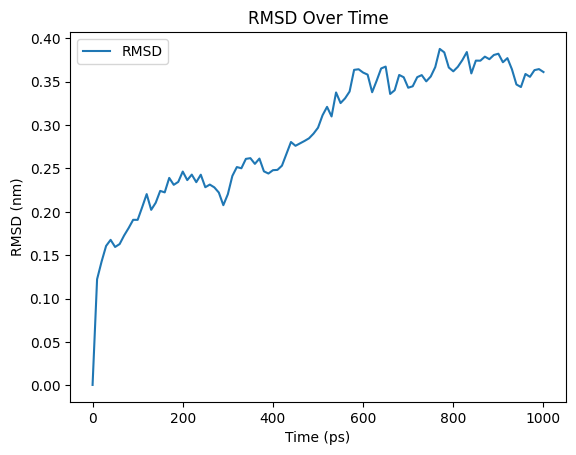

In [1]:
import matplotlib.pyplot as plt

# Cargar datos
data = []
with open('rmsd_residuo.xvg', 'r') as f:
    for line in f:
        if not line.startswith(('#', '@')):
            data.append([float(x) for x in line.split()])

# Extraer columnas
x = [row[0] for row in data]
y = [row[1] for row in data]

# Crear el gráfico
plt.plot(x, y, label='RMSD')
plt.xlabel('Time (ps)')
plt.ylabel('RMSD (nm)')
plt.title('RMSD Over Time')
plt.legend()
plt.show()


TypeError: Invalid shape (0,) for image data

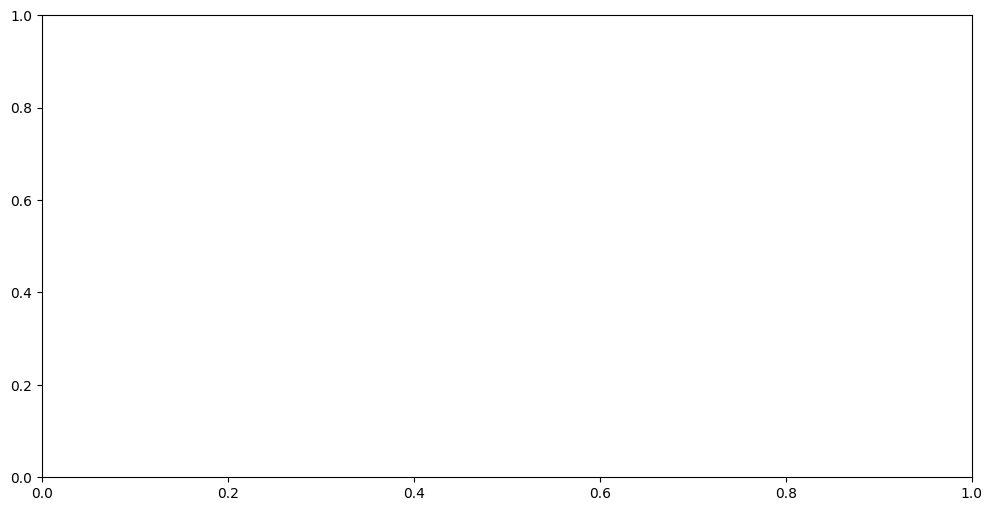

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Leer el archivo DAT
def read_sec_struct_dat(file):
    with open(file, 'r') as f:
        lines = f.readlines()

    # Convertir los datos en una matriz
    frames = []
    for line in lines:
        if line.startswith(' ') or line.startswith('\t'):
            parts = line.split()
            if len(parts) > 1:
                frames.append(parts[1:])

    # Convertir a un array de numpy
    data = np.array(frames)

    # Convertir datos a enteros
    data = data.astype(int)
    return data

# Leer el archivo DAT
data = read_sec_struct_dat('sec_struct.dat')

# Crear la imagen
plt.figure(figsize=(12, 6))
plt.imshow(data, cmap='viridis', origin='lower', aspect='auto')
plt.colorbar(label='Tipo de Estructura Secundaria')
plt.title('Evolución de la Estructura Secundaria a lo Largo de la Simulación')
plt.xlabel('Frame')
plt.ylabel('Residuo')
plt.savefig('sec_struct.png')
plt.show()


In [3]:
cat sec_struct.dat


~~~PPP~PPPPP~PPP~~~~~~~PPPPP~~~~~~S~~~~~~~S~~~~~~~~~~~~~~~~~~SS~~~~SSSSSSSSSSSSSSSSSSS~SS~~~~~~SSS~~~~SSPPS~~SS~~~~~~~~~~SSS~~~~~~~~~~~~~~~SSSSSSSSSSSSSS~~SSSSSSSSSSSSSSSSSSS~~~SS~~~~PPSSS~~~~SSS~~~~~~~~~~~~~~SSS~~~~~~~~~~~~~~~S~SSSSSSSSS~~SSSSS~~S~~~SSSSSSSSSSSSS~~~~~SSSSS~~~~~~~~~~~SS~SSS~~~~~~~SSS~~~~~~SSSSSSSSS~~~~S~SSS~~~~~SSSSS~~~~~SSS~~PPSS~~~~SPPPSSSSSSSSSSS~~~SSSSSSSSSSSSSSS~SSS~SSSSSS~~~~~SSPPP~~~~~PPPPP~~~~SSS~~~PPPSSS~~~~SS~~~SS~~~~~~~~~~~~S~SSSS~SSSSSSSSSSSSSSSSSSS~~~~SS~S~~~~~~SSSSSSSSSSSSSSSSSS~~~~~~~~~SS~SSSSSSSSSSSSSS~~~~~~~~SSSSSS~~SSSSSSSSSSSSSSSS~~~~~~~SSSS~SSSSS~~~~~~~~~~PPPSS~SSS~~~~~~~~~~SSSS~~~~~~~~~~SSS~~S~SS~SSSSSSSSSSSSSSSSS~~S~~~~~~~S~~SSSSSSSSSSSSSSSSSSSSSSSSS~~~~~~~~~~~~SS~~~~~~SSSSS~~SSS~PPPSS~~~~SSSS~SSS~~~~~~~S~~SSS~PPPPP~~~S~~SS~~~SSSSSSSSSSSSS~~SSSSS~~SS~SSSSSSSSSSSSSSSSSSSSSSSSSS~~~~~SSSSSSSSSSSSSSS~~~SSSSSS~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~S~~~~~~~S~~~~~~~~~~~~~~~~~~SSS~~~SSSSSSSSSSSSSSSSSSS~~SPPP~~~SSS~~~~SS~~S~~SS~~~~~~~~~~SSS~~~~~~~~~~~~~~~S

invalid literal for int() with base 10: '~~~PPP~PPPPP~PPP~~~~~~~PPPPP~~~~~~S~~~~~~~S~~~~~~~~~~~~~~~~~~SS~~~~SSSSSSSSSSSSSSSSSSS~SS~~~~~~SSS~~~~SSPPS~~SS~~~~~~~~~~SSS~~~~~~~~~~~~~~~SSSSSSSSSSSSSS~~SSSSSSSSSSSSSSSSSSS~~~SS~~~~PPSSS~~~~SSS~~~~


TypeError: Invalid shape (0,) for image data

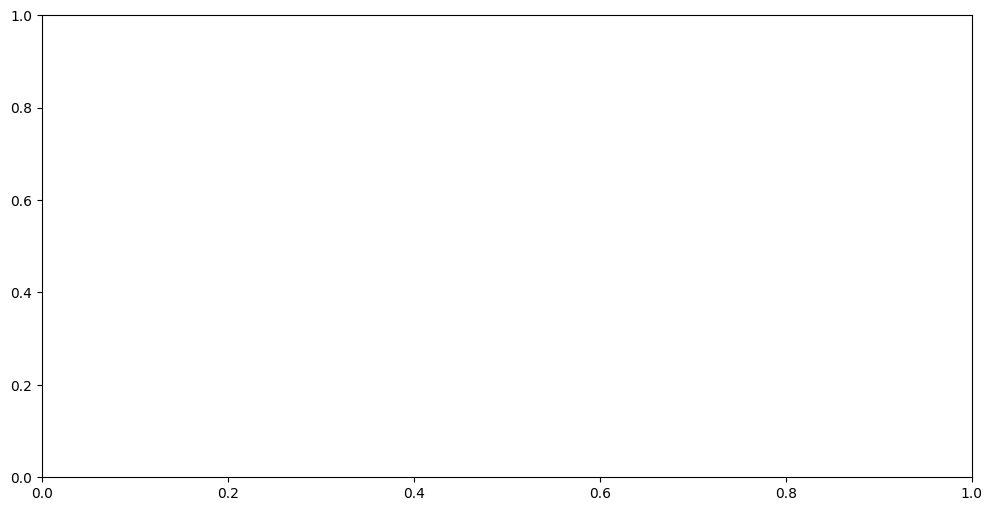

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def read_sec_struct_dat(file):
    with open(file, 'r') as f:
        lines = f.readlines()

    frames = []
    for line in lines:
        if line.strip():
            parts = line.split()
            frames.append(parts)

    if frames:
        data = np.array(frames).astype(int)
        return data
    else:
        raise ValueError("El archivo DAT está vacío o malformado.")

try:
    data = read_sec_struct_dat('sec_struct.dat')
except ValueError as e:
    print(e)
    exit(1)

plt.figure(figsize=(12, 6))
plt.imshow(data, cmap='viridis', origin='lower', aspect='auto')
plt.colorbar(label='Tipo de Estructura Secundaria')
plt.title('Evolución de la Estructura Secundaria a lo Largo de la Simulación')
plt.xlabel('Frame')
plt.ylabel('Residuo')
plt.savefig('sec_struct.png')
plt.show()


In [5]:
print(data)


[]


In [7]:
import numpy as np

# Mapeo de caracteres a números
mapping = {'~': 0, 'P': 1, 'S': 2}

# Leer archivo .dat
with open('archivo.dat', 'r') as f:
    data = f.read()

# Convertir caracteres a números
numeric_data = [mapping.get(c, -1) for c in data]  # -1 para caracteres no mapeados

# Contar el número total de caracteres
total_chars = len(numeric_data)

# Encontrar divisores del número total de caracteres para posibles dimensiones de la matriz
def find_divisors(n):
    divisors = [i for i in range(1, n + 1) if n % i == 0]
    return divisors

# Obtener posibles valores para n_filas
possible_rows = find_divisors(total_chars)

# Elegir un valor adecuado para n_filas
# Por simplicidad, elegimos el divisor más cercano a una raíz cuadrada para una matriz más cuadrada
n_filas = possible_rows[len(possible_rows) // 2]
n_columnas = total_chars // n_filas

# Convertir a una matriz bidimensional
data_array = np.array(numeric_data).reshape((n_filas, n_columnas))

# Guardar como CSV
np.savetxt('datos_numericos.csv', data_array, delimiter=',', fmt='%d')

# Mostrar los datos
print(f'Matriz generada con dimensiones: {n_filas}



SyntaxError: unterminated string literal (detected at line 36) (<ipython-input-7-f907bf3ee7ca>, line 36)

In [9]:
import numpy as np

# Mapeo de caracteres a números
mapping = {'~': 0, 'P': 1, 'S': 2}

# Leer archivo .dat
with open('sec_struct.dat', 'r') as f:
    data = f.read()

# Convertir caracteres a números
numeric_data = [mapping.get(c, -1) for c in data]  # -1 para caracteres no mapeados

# Contar el número total de caracteres
total_chars = len(numeric_data)

# Encontrar divisores del número total de caracteres para posibles dimensiones de la matriz
def find_divisors(n):
    divisors = [i for i in range(1, n + 1) if n % i == 0]
    return divisors

# Obtener posibles valores para n_filas
possible_rows = find_divisors(total_chars)

# Elegir un valor adecuado para n_filas
# Por simplicidad, elegimos el divisor más cercano a una raíz cuadrada para una matriz más cuadrada
n_filas = possible_rows[len(possible_rows) // 2]
n_columnas = total_chars // n_filas

# Convertir a una matriz bidimensional
data_array = np.array(numeric_data).reshape((n_filas, n_columnas))

# Guardar como CSV
np.savetxt('datos_numericos.csv', data_array, delimiter=',', fmt='%d')

# Mostrar los datos
print(f'Matriz generada con dimensiones: {n_filas} filas x {n_columnas} columnas')
print(data_array)



Matriz generada con dimensiones: 404 filas x 215 columnas
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  1  1  1]
 [ 2  2  2 ...  2  2  2]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 2  2  2 ...  2  2  2]
 [ 2  2  2 ...  0  0 -1]]


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos del archivo
with open('sec_struct.dat', 'r') as file:
    data_lines = file.readlines()

# Concatenar todas las líneas en una sola cadena
data_str = ''.join(data_lines).replace('\n', '')

# Crear un diccionario de mapeo de caracteres a números
unique_chars = set(data_str)
mapping = {char: idx for idx, char in enumerate(unique_chars)}

print("Diccionario de mapeo:", mapping)

# Convertir los caracteres en números usando el diccionario de mapeo
data_numeric = [mapping[char] for char in data_str]

# Definir el número de filas basado en la longitud total de caracteres
# Suponiendo que el archivo contiene 4 conjuntos de datos, y cada fila representa una estructura completa
n_filas = 4

# Dividir los datos en una matriz 2D
data_array = np.array(data_numeric)
data_matrix = data_array.reshape(n_filas, -1)

print(f'Matriz generada con dimensiones: {data_matrix.shape[0]} filas x {data_matrix.shape[1]} columnas')
print(data_matrix)

# Graficar los datos
plt.figure(figsize=(12, 6))
plt.imshow(data_matrix, cmap='viridis', origin='lower', aspect='auto')
plt.colorbar(label='Tipo de Estructura Secundaria')
plt.title('Evolución de la Estructura Secundaria a lo Largo de la Simulación')
plt.xlabel('Índice de Residuo')
plt.ylabel('Frame de Simulación')
plt.show()


Diccionario de mapeo: {'P': 0, '~': 1, 'S': 2}


ValueError: cannot reshape array of size 86759 into shape (4,newaxis)

Diccionario de mapeo: {'P': 0, '~': 1, 'S': 2}
Divisores posibles: [1, 101, 859, 86759]
Matriz generada con dimensiones: 86759 filas x 1 columnas
[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


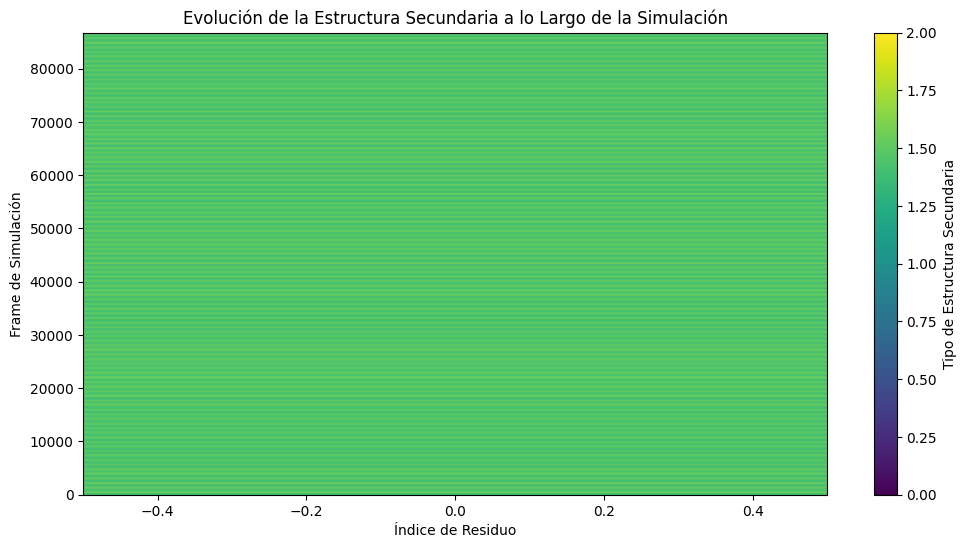

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Cargar los datos del archivo
with open('sec_struct.dat', 'r') as file:
    data_lines = file.readlines()

# Concatenar todas las líneas en una sola cadena
data_str = ''.join(data_lines).replace('\n', '')

# Crear un diccionario de mapeo de caracteres a números
unique_chars = set(data_str)
mapping = {char: idx for idx, char in enumerate(unique_chars)}

print("Diccionario de mapeo:", mapping)

# Convertir los caracteres en números usando el diccionario de mapeo
data_numeric = [mapping[char] for char in data_str]

# Determinar la longitud total de caracteres
total_chars = len(data_numeric)

# Encontrar todos los divisores de la longitud total de caracteres
def find_divisors(n):
    divisors = []
    for i in range(1, n + 1):
        if n % i == 0:
            divisors.append(i)
    return divisors

divisors = find_divisors(total_chars)
print("Divisores posibles:", divisors)

# Seleccionar un divisor adecuado (por ejemplo, el máximo)
n_filas = max(divisors)

# Dividir los datos en una matriz 2D
data_array = np.array(data_numeric)
data_matrix = data_array.reshape(n_filas, -1)

print(f'Matriz generada con dimensiones: {data_matrix.shape[0]} filas x {data_matrix.shape[1]} columnas')
print(data_matrix)

# Graficar los datos
plt.figure(figsize=(12, 6))
plt.imshow(data_matrix, cmap='viridis', origin='lower', aspect='auto')
plt.colorbar(label='Tipo de Estructura Secundaria')
plt.title('Evolución de la Estructura Secundaria a lo Largo de la Simulación')
plt.xlabel('Índice de Residuo')
plt.ylabel('Frame de Simulación')
plt.show()


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos del archivo
file_path = 'sec_struct.dat'

try:
    with open(file_path, 'r') as file:
        data_str = file.read().replace('\n', '')  # Leer todo el archivo en una sola cadena
except FileNotFoundError:
    raise FileNotFoundError(f'El archivo en {file_path} no se encontró.')

# Crear un diccionario de mapeo de caracteres a números
# Definimos los colores para cada tipo de estructura secundaria
mapping = {
    'P': 0,  # Hélice Alfa
    'S': 1,  # Hoja Beta
    '~': 2   # Estructura Extendida (o "desconocida")
}

# Convertir los caracteres en números usando el diccionario de mapeo
data_numeric = [mapping.get(char, -1) for char in data_str]  # Usa -1 para caracteres desconocidos

# Determinar la longitud total de caracteres
total_chars = len(data_numeric)

# Encontrar todos los divisores de la longitud total de caracteres
def find_divisors(n):
    divisors = set()
    for i in range(1, int(math.sqrt(n)) + 1):
        if n % i == 0:
            divisors.add(i)
            divisors.add(n // i)
    return sorted(divisors)

divisors = find_divisors(total_chars)
print("Divisores posibles:", divisors)

# Seleccionar un divisor adecuado (por ejemplo, el máximo)
n_filas = max(divisors)

# Dividir los datos en una matriz 2D
data_array = np.array(data_numeric)
data_matrix = data_array.reshape(n_filas, -1)

print(f'Matriz generada con dimensiones: {data_matrix.shape[0]} filas x {data_matrix.shape[1]} columnas')
print(data_matrix)

# Crear una lista de colores para cada tipo de estructura secundaria
# Usamos una paleta de colores personalizada para cada tipo de estructura secundaria
colors = ['blue', 'green', 'gray']  # Azul para Hélice Alfa, Verde para Hoja Beta, Gris para Estructura Extendida

# Graficar los datos
plt.figure(figsize=(12, 6))
plt.imshow(data_matrix, cmap=plt.colors.ListedColormap(colors), origin='lower', aspect='auto')

# Añadir una barra de color para la leyenda
cbar = plt.colorbar(ticks=[0, 1, 2])
cbar.set_label('Tipo de Estructura Secundaria')
cbar.set_ticks([0.25, 1.25, 2.25])
cbar.set_ticklabels(['Hélice Alfa', 'Hoja Beta', 'Estructura Extendida'])

plt.title('Evolución de la Estructura Secundaria a lo Largo de la Simulación')
plt.xlabel('Índice de Residuo')
plt.ylabel('Frame de Simulación')
plt.show()


Divisores posibles: [1, 101, 859, 86759]
Matriz generada con dimensiones: 86759 filas x 1 columnas
[[2]
 [2]
 [2]
 ...
 [2]
 [2]
 [2]]


AttributeError: module 'matplotlib.pyplot' has no attribute 'colors'

<Figure size 1200x600 with 0 Axes>

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Cargar los datos del archivo
file_path = 'sec_struct.dat'

try:
    with open(file_path, 'r') as file:
        data_str = file.read().replace('\n', '')  # Leer todo el archivo en una sola cadena
except FileNotFoundError:
    raise FileNotFoundError(f'El archivo en {file_path} no se encontró.')

# Crear un diccionario de mapeo de caracteres a números
# Definimos los colores para cada tipo de estructura secundaria
mapping = {
    'P': 0,  # Hélice Alfa
    'S': 1,  # Hoja Beta
    '~': 2   # Estructura Extendida (o "desconocida")
}

# Convertir los caracteres en números usando el diccionario de mapeo
data_numeric = [mapping.get(char, -1) for char in data_str]  # Usa -1 para caracteres desconocidos

# Determinar la longitud total de caracteres
total_chars = len(data_numeric)

# Encontrar todos los divisores de la longitud total de caracteres
def find_divisors(n):
    divisors = set()
    for i in range(1, int(math.sqrt(n)) + 1):
        if n % i == 0:
            divisors.add(i)
            divisors.add(n // i)
    return sorted(divisors)

divisors = find_divisors(total_chars)
print("Divisores posibles:", divisors)

# Seleccionar un divisor adecuado (por ejemplo, el segundo más grande para tener una forma más visualizable)
if len(divisors) > 1:
    n_filas = divisors[-2]  # Usamos el segundo divisor más grande
else:
    n_filas = divisors[0]  # Solo hay un divisor, lo usamos

# Dividir los datos en una matriz 2D
data_array = np.array(data_numeric)
data_matrix = data_array.reshape(n_filas, -1)

print(f'Matriz generada con dimensiones: {data_matrix.shape[0]} filas x {data_matrix.shape[1]} columnas')
print(data_matrix)

# Crear una lista de colores para cada tipo de estructura secundaria
# Usamos una paleta de colores personalizada para cada tipo de estructura secundaria
colors = ['blue', 'green', 'gray']  # Azul para Hélice Alfa, Verde para Hoja Beta, Gris para Estructura Extendida

# Crear el mapa de colores
cmap = plt.colors.ListedColormap(colors)

# Graficar los datos
plt.figure(figsize=(12, 6))
plt.imshow(data_matrix, cmap=cmap, origin='lower', aspect='auto')

# Añadir una barra de color para la leyenda
cbar = plt.colorbar(ticks=[0, 1, 2])
cbar.set_label('Tipo de Estructura Secundaria')
cbar.set_ticks([0.25, 1.25, 2.25])
cbar.set_ticklabels(['Hélice Alfa', 'Hoja Beta', 'Estructura Extendida'])

plt.title('Evolución de la Estructura Secundaria a lo Largo de la Simulación')
plt.xlabel('Índice de Residuo')
plt.ylabel('Frame de Simulación')
plt.show()


Divisores posibles: [1, 101, 859, 86759]
Matriz generada con dimensiones: 859 filas x 101 columnas
[[2 2 2 ... 2 2 2]
 [2 1 1 ... 2 2 2]
 [2 2 2 ... 1 2 2]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 2 ... 2 1 1]
 [2 2 2 ... 2 2 2]]


AttributeError: module 'matplotlib.pyplot' has no attribute 'colors'

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.colors import ListedColormap  # Importar ListedColormap directamente

# Cargar los datos del archivo
file_path = '/mnt/data/sec_struct.dat'

try:
    with open(file_path, 'r') as file:
        data_str = file.read().replace('\n', '')  # Leer todo el archivo en una sola cadena
except FileNotFoundError:
    raise FileNotFoundError(f'El archivo en {file_path} no se encontró.')

# Crear un diccionario de mapeo de caracteres a números
# Definimos los colores para cada tipo de estructura secundaria
mapping = {
    'P': 0,  # Hélice Alfa
    'S': 1,  # Hoja Beta
    '~': 2   # Estructura Extendida (o "desconocida")
}

# Convertir los caracteres en números usando el diccionario de mapeo
data_numeric = [mapping.get(char, -1) for char in data_str]  # Usa -1 para caracteres desconocidos

# Determinar la longitud total de caracteres
total_chars = len(data_numeric)

# Encontrar todos los divisores de la longitud total de caracteres
def find_divisors(n):
    divisors = set()
    for i in range(1, int(math.sqrt(n)) + 1):
        if n % i == 0:
            divisors.add(i)
            divisors.add(n // i)
    return sorted(divisors)

divisors = find_divisors(total_chars)
print("Divisores posibles:", divisors)

# Seleccionar un divisor adecuado (por ejemplo, el segundo más grande para tener una forma más visualizable)
if len(divisors) > 1:
    n_filas = divisors[-2]  # Usamos el segundo divisor más grande
else:
    n_filas = divisors[0]  # Solo hay un divisor, lo usamos

# Dividir los datos en una matriz 2D
data_array = np.array(data_numeric)
data_matrix = data_array.reshape(


SyntaxError: incomplete input (<ipython-input-17-92081c3551cf>, line 49)

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Cargar los datos del archivo
file_path = 'sec_struct.dat'

try:
    with open(file_path, 'r') as file:
        data_str = file.read().replace('\n', '')  # Leer todo el archivo en una sola cadena
except FileNotFoundError:
    raise FileNotFoundError(f'El archivo en {file_path} no se encontró.')

# Crear un diccionario de mapeo de caracteres a números
# Definimos los colores para cada tipo de estructura secundaria
mapping = {
    'P': 0,  # Hélice Alfa
    'S': 1,  # Hoja Beta
    '~': 2   # Estructura Extendida (o "desconocida")
}

# Convertir los caracteres en números usando el diccionario de mapeo
data_numeric = [mapping.get(char, -1) for char in data_str]  # Usa -1 para caracteres desconocidos

# Determinar la longitud total de caracteres
total_chars = len(data_numeric)

# Encontrar todos los divisores de la longitud total de caracteres
def find_divisors(n):
    divisors = set()
    for i in range(1, int(math.sqrt(n)) + 1):
        if n % i == 0:
            divisors.add(i)
            divisors.add(n // i)
    return sorted(divisors)

divisors = find_divisors(total_chars)
print("Divisores posibles:", divisors)

# Seleccionar un divisor adecuado (por ejemplo, el segundo más grande para tener una forma más visualizable)
if len(divisors) > 1:
    n_filas = divisors[-2]  # Usamos el segundo divisor más grande
else:
    n_filas = divisors[0]  # Solo hay un divisor, lo usamos

# Dividir los datos en una matriz 2D
data_array = np.array(data_numeric)
data_matrix = data_array.reshape(n_filas, -1)

print(f'Matriz generada con dimensiones: {data_matrix.shape[0]} filas x {data_matrix.shape[1]} columnas')
print(data_matrix)

# Crear una lista de colores para cada tipo de estructura secundaria
# Usamos una paleta de colores personalizada para cada tipo de estructura secundaria
colors = ['blue', 'green', 'gray']  # Azul para Hélice Alfa, Verde para Hoja Beta, Gris para Estructura Extendida

# Crear el mapa de colores usando `plt.cm`
cmap = plt.cm.ListedColormap(colors)

# Graficar los datos
plt.figure(figsize=(12, 6))
plt.imshow(data_matrix, cmap=cmap, origin='lower', aspect='auto')

# Añadir una barra de color para la leyenda
cbar = plt.colorbar(ticks=[0, 1, 2])
cbar.set_label('Tipo de Estructura Secundaria')
cbar.set_ticks([0.25, 1.25, 2.25])
cbar.set_ticklabels(['Hélice Alfa', 'Hoja Beta', 'Estructura Extendida'])

plt.title('Evolución de la Estructura Secundaria a lo Largo de la Simulación')
plt.xlabel('Índice de Residuo')
plt.ylabel('Frame de Simulación')
plt.show()


Divisores posibles: [1, 101, 859, 86759]
Matriz generada con dimensiones: 859 filas x 101 columnas
[[2 2 2 ... 2 2 2]
 [2 1 1 ... 2 2 2]
 [2 2 2 ... 1 2 2]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 2 ... 2 1 1]
 [2 2 2 ... 2 2 2]]


AttributeError: module 'matplotlib.cm' has no attribute 'ListedColormap'

In [20]:
pip install --upgrade matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 18.0 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


Divisores posibles: [1, 101, 859, 86759]
Matriz generada con dimensiones: 859 filas x 101 columnas
[[2 2 2 ... 2 2 2]
 [2 1 1 ... 2 2 2]
 [2 2 2 ... 1 2 2]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 2 ... 2 1 1]
 [2 2 2 ... 2 2 2]]


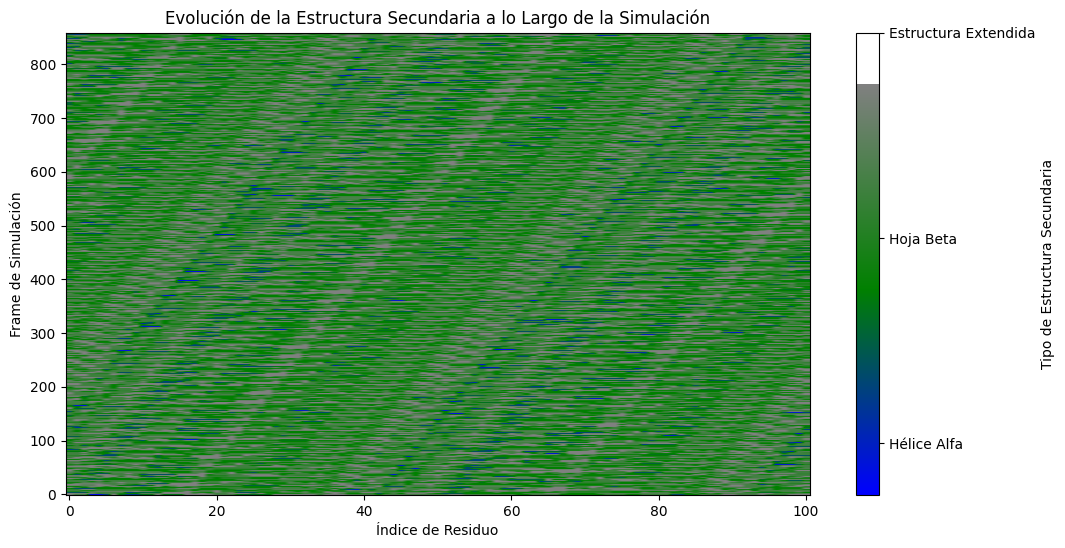

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.colors import LinearSegmentedColormap

# Cargar los datos del archivo
file_path = 'sec_struct.dat'

try:
    with open(file_path, 'r') as file:
        data_str = file.read().replace('\n', '')  # Leer todo el archivo en una sola cadena
except FileNotFoundError:
    raise FileNotFoundError(f'El archivo en {file_path} no se encontró.')

# Crear un diccionario de mapeo de caracteres a números
# Definimos los colores para cada tipo de estructura secundaria
mapping = {
    'P': 0,  # Hélice Alfa
    'S': 1,  # Hoja Beta
    '~': 2   # Estructura Extendida (o "desconocida")
}

# Convertir los caracteres en números usando el diccionario de mapeo
data_numeric = [mapping.get(char, -1) for char in data_str]  # Usa -1 para caracteres desconocidos

# Determinar la longitud total de caracteres
total_chars = len(data_numeric)

# Encontrar todos los divisores de la longitud total de caracteres
def find_divisors(n):
    divisors = set()
    for i in range(1, int(math.sqrt(n)) + 1):
        if n % i == 0:
            divisors.add(i)
            divisors.add(n // i)
    return sorted(divisors)

divisors = find_divisors(total_chars)
print("Divisores posibles:", divisors)

# Seleccionar un divisor adecuado (por ejemplo, el segundo más grande para tener una forma más visualizable)
if len(divisors) > 1:
    n_filas = divisors[-2]  # Usamos el segundo divisor más grande
else:
    n_filas = divisors[0]  # Solo hay un divisor, lo usamos

# Dividir los datos en una matriz 2D
data_array = np.array(data_numeric)
data_matrix = data_array.reshape(n_filas, -1)

print(f'Matriz generada con dimensiones: {data_matrix.shape[0]} filas x {data_matrix.shape[1]} columnas')
print(data_matrix)

# Crear una lista de colores para cada tipo de estructura secundaria
# Usamos una paleta de colores personalizada para cada tipo de estructura secundaria
colors = ['blue', 'green', 'gray']  # Azul para Hélice Alfa, Verde para Hoja Beta, Gris para Estructura Extendida

# Crear el mapa de colores usando `LinearSegmentedColormap`
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

# Graficar los datos
plt.figure(figsize=(12, 6))
plt.imshow(data_matrix, cmap=cmap, origin='lower', aspect='auto')

# Añadir una barra de color para la leyenda
cbar = plt.colorbar(ticks=[0, 1, 2])
cbar.set_label('Tipo de Estructura Secundaria')
cbar.set_ticks([0.25, 1.25, 2.25])
cbar.set_ticklabels(['Hélice Alfa', 'Hoja Beta', 'Estructura Extendida'])

plt.title('Evolución de la Estructura Secundaria a lo Largo de la Simulación')
plt.xlabel('Índice de Residuo')
plt.ylabel('Frame de Simulación')
plt.show()


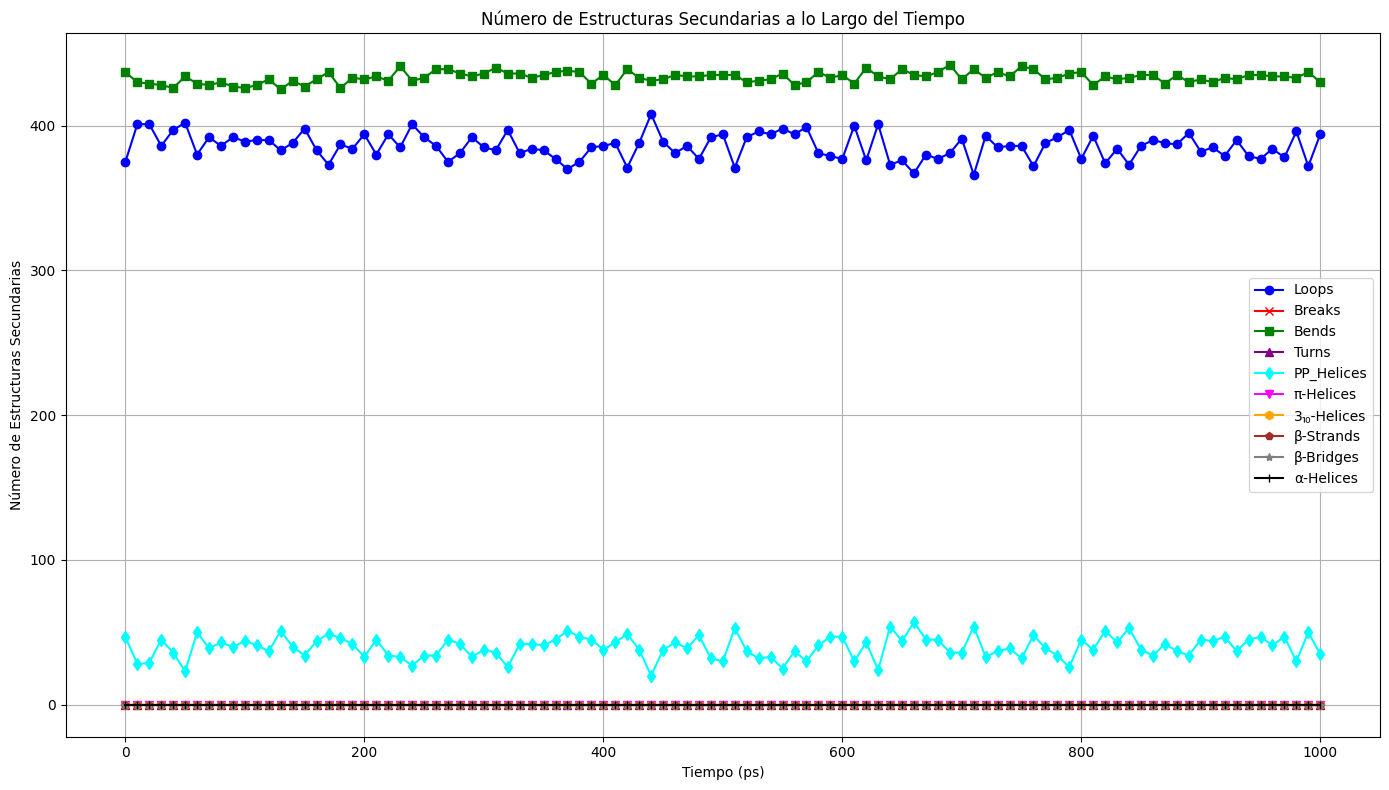

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def leer_archivo_xvg(ruta_archivo):
    """
    Lee un archivo .xvg y extrae los datos para visualización.
    :param ruta_archivo: Ruta al archivo .xvg
    :return: Arrays de datos para el tiempo y los valores de estructuras secundarias
    """
    tiempos = []
    loops = []
    breaks = []
    bends = []
    turns = []
    pp_helices = []
    pi_helices = []
    three_10_helices = []
    beta_strands = []
    beta_bridges = []
    alpha_helices = []

    with open(ruta_archivo, 'r') as archivo:
        for linea in archivo:
            # Ignorar líneas de comentarios (líneas que comienzan con @ o #)
            if linea.startswith(('@', '#')):
                continue
            columnas = linea.split()
            tiempos.append(float(columnas[0]))
            loops.append(float(columnas[1]))
            breaks.append(float(columnas[2]))
            bends.append(float(columnas[3]))
            turns.append(float(columnas[4]))
            pp_helices.append(float(columnas[5]))
            pi_helices.append(float(columnas[6]))
            three_10_helices.append(float(columnas[7]))
            beta_strands.append(float(columnas[8]))
            beta_bridges.append(float(columnas[9]))
            alpha_helices.append(float(columnas[10]))

    return (np.array(tiempos), np.array(loops), np.array(breaks), np.array(bends),
            np.array(turns), np.array(pp_helices), np.array(pi_helices),
            np.array(three_10_helices), np.array(beta_strands), np.array(beta_bridges),
            np.array(alpha_helices))

def graficar_datos(tiempos, loops, breaks, bends, turns, pp_helices, pi_helices,
                   three_10_helices, beta_strands, beta_bridges, alpha_helices):
    """
    Crea un gráfico de las estructuras secundarias extraídas del archivo .xvg.
    :param tiempos: Array de tiempos
    :param loops: Array de Loops
    :param breaks: Array de Breaks
    :param bends: Array de Bends
    :param turns: Array de Turns
    :param pp_helices: Array de PP_Helices
    :param pi_helices: Array de π-Helices
    :param three_10_helices: Array de 3⏨-Helices
    :param beta_strands: Array de β-Strands
    :param beta_bridges: Array de β-Bridges
    :param alpha_helices: Array de α-Helices
    """
    plt.figure(figsize=(14, 8))
    plt.plot(tiempos, loops, label='Loops', color='blue', linestyle='-', marker='o')
    plt.plot(tiempos, breaks, label='Breaks', color='red', linestyle='-', marker='x')
    plt.plot(tiempos, bends, label='Bends', color='green', linestyle='-', marker='s')
    plt.plot(tiempos, turns, label='Turns', color='purple', linestyle='-', marker='^')
    plt.plot(tiempos, pp_helices, label='PP_Helices', color='cyan', linestyle='-', marker='d')
    plt.plot(tiempos, pi_helices, label='π-Helices', color='magenta', linestyle='-', marker='v')
    plt.plot(tiempos, three_10_helices, label='3⏨-Helices', color='orange', linestyle='-', marker='h')
    plt.plot(tiempos, beta_strands, label='β-Strands', color='brown', linestyle='-', marker='p')
    plt.plot(tiempos, beta_bridges, label='β-Bridges', color='gray', linestyle='-', marker='*')
    plt.plot(tiempos, alpha_helices, label='α-Helices', color='black', linestyle='-', marker='|')

    plt.title('Número de Estructuras Secundarias a lo Largo del Tiempo')
    plt.xlabel('Tiempo (ps)')
    plt.ylabel('Número de Estructuras Secundarias')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    plt.show()

# Ruta al archivo .xvg
ruta_archivo = 'num.xvg'

# Leer el archivo .xvg
(tiempos, loops, breaks, bends, turns, pp_helices, pi_helices,
 three_10_helices, beta_strands, beta_bridges, alpha_helices) = leer_archivo_xvg(ruta_archivo)

# Graficar los datos
graficar_datos(tiempos, loops, breaks, bends, turns, pp_helices, pi_helices,
               three_10_helices, beta_strands, beta_bridges, alpha_helices)


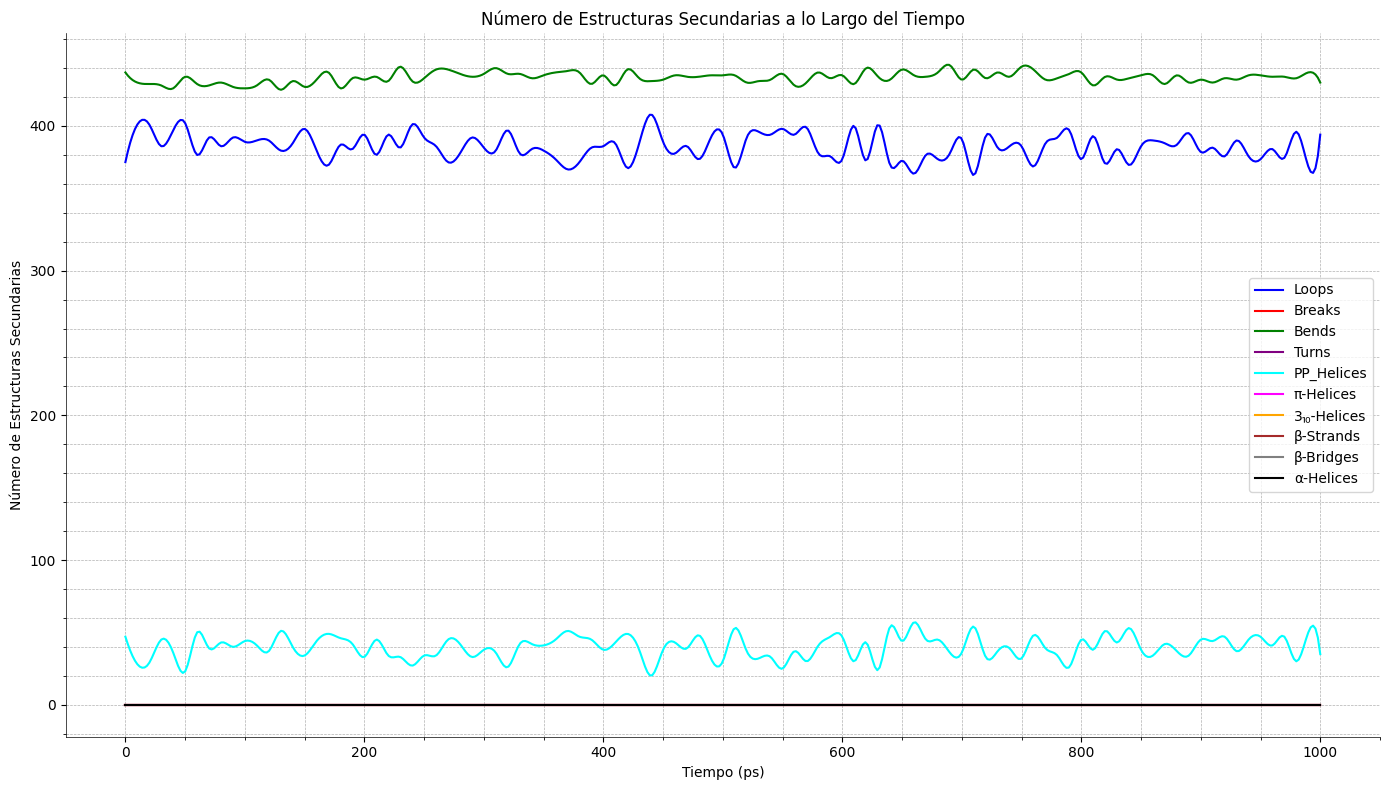

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

def leer_archivo_xvg(ruta_archivo):
    """
    Lee un archivo .xvg y extrae los datos para visualización.
    :param ruta_archivo: Ruta al archivo .xvg
    :return: Arrays de datos para el tiempo y los valores de estructuras secundarias
    """
    tiempos = []
    loops = []
    breaks = []
    bends = []
    turns = []
    pp_helices = []
    pi_helices = []
    three_10_helices = []
    beta_strands = []
    beta_bridges = []
    alpha_helices = []

    with open(ruta_archivo, 'r') as archivo:
        for linea in archivo:
            # Ignorar líneas de comentarios (líneas que comienzan con @ o #)
            if linea.startswith(('@', '#')):
                continue
            columnas = linea.split()
            tiempos.append(float(columnas[0]))
            loops.append(float(columnas[1]))
            breaks.append(float(columnas[2]))
            bends.append(float(columnas[3]))
            turns.append(float(columnas[4]))
            pp_helices.append(float(columnas[5]))
            pi_helices.append(float(columnas[6]))
            three_10_helices.append(float(columnas[7]))
            beta_strands.append(float(columnas[8]))
            beta_bridges.append(float(columnas[9]))
            alpha_helices.append(float(columnas[10]))

    return (np.array(tiempos), np.array(loops), np.array(breaks), np.array(bends),
            np.array(turns), np.array(pp_helices), np.array(pi_helices),
            np.array(three_10_helices), np.array(beta_strands), np.array(beta_bridges),
            np.array(alpha_helices))

def suavizar_datos(tiempos, datos):
    """
    Suaviza los datos utilizando interpolación cúbica.
    :param tiempos: Array de tiempos
    :param datos: Array de datos a suavizar
    :return: Arrays de tiempos y datos suavizados
    """
    tiempos_suavizados = np.linspace(tiempos.min(), tiempos.max(), 500)  # Crear más puntos en el tiempo para suavizar
    datos_suavizados = make_interp_spline(tiempos, datos, k=3)(tiempos_suavizados)  # Interpolación cúbica

    return tiempos_suavizados, datos_suavizados

def graficar_datos(tiempos, loops, breaks, bends, turns, pp_helices, pi_helices,
                   three_10_helices, beta_strands, beta_bridges, alpha_helices):
    """
    Crea un gráfico de las estructuras secundarias extraídas del archivo .xvg.
    :param tiempos: Array de tiempos
    :param loops: Array de Loops
    :param breaks: Array de Breaks
    :param bends: Array de Bends
    :param turns: Array de Turns
    :param pp_helices: Array de PP_Helices
    :param pi_helices: Array de π-Helices
    :param three_10_helices: Array de 3⏨-Helices
    :param beta_strands: Array de β-Strands
    :param beta_bridges: Array de β-Bridges
    :param alpha_helices: Array de α-Helices
    """
    plt.figure(figsize=(14, 8))

    # Suavizar datos
    tiempos_suavizados, loops_suavizado = suavizar_datos(tiempos, loops)
    _, breaks_suavizado = suavizar_datos(tiempos, breaks)
    _, bends_suavizado = suavizar_datos(tiempos, bends)
    _, turns_suavizado = suavizar_datos(tiempos, turns)
    _, pp_helices_suavizado = suavizar_datos(tiempos, pp_helices)
    _, pi_helices_suavizado = suavizar_datos(tiempos, pi_helices)
    _, three_10_helices_suavizado = suavizar_datos(tiempos, three_10_helices)
    _, beta_strands_suavizado = suavizar_datos(tiempos, beta_strands)
    _, beta_bridges_suavizado = suavizar_datos(tiempos, beta_bridges)
    _, alpha_helices_suavizado = suavizar_datos(tiempos, alpha_helices)

    # Graficar los datos suavizados
    plt.plot(tiempos_suavizados, loops_suavizado, label='Loops', color='blue')
    plt.plot(tiempos_suavizados, breaks_suavizado, label='Breaks', color='red')
    plt.plot(tiempos_suavizados, bends_suavizado, label='Bends', color='green')
    plt.plot(tiempos_suavizados, turns_suavizado, label='Turns', color='purple')
    plt.plot(tiempos_suavizados, pp_helices_suavizado, label='PP_Helices', color='cyan')
    plt.plot(tiempos_suavizados, pi_helices_suavizado, label='π-Helices', color='magenta')
    plt.plot(tiempos_suavizados, three_10_helices_suavizado, label='3⏨-Helices', color='orange')
    plt.plot(tiempos_suavizados, beta_strands_suavizado, label='β-Strands', color='brown')
    plt.plot(tiempos_suavizados, beta_bridges_suavizado, label='β-Bridges', color='gray')
    plt.plot(tiempos_suavizados, alpha_helices_suavizado, label='α-Helices', color='black')

    plt.title('Número de Estructuras Secundarias a lo Largo del Tiempo')
    plt.xlabel('Tiempo (ps)')
    plt.ylabel('Número de Estructuras Secundarias')
    plt.legend()

    # Quitar los cuadros divisores internos
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_linewidth(0.5)
    plt.gca().spines['bottom'].set_linewidth(0.5)

    plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Ajustar estilo de cuadrícula
    plt.minorticks_on()  # Activar marcas menores en los ejes
    plt.tight_layout()

    plt.show()

# Ruta al archivo .xvg
ruta_archivo = 'num.xvg'

# Leer el archivo .xvg
(tiempos, loops, breaks, bends, turns, pp_helices, pi_helices,
 three_10_helices, beta_strands, beta_bridges, alpha_helices) = leer_archivo_xvg(ruta_archivo)

# Graficar los datos
graficar_datos(tiempos, loops, breaks, bends, turns, pp_helices, pi_helices,
               three_10_helices, beta_strands, beta_bridges, alpha_helices)


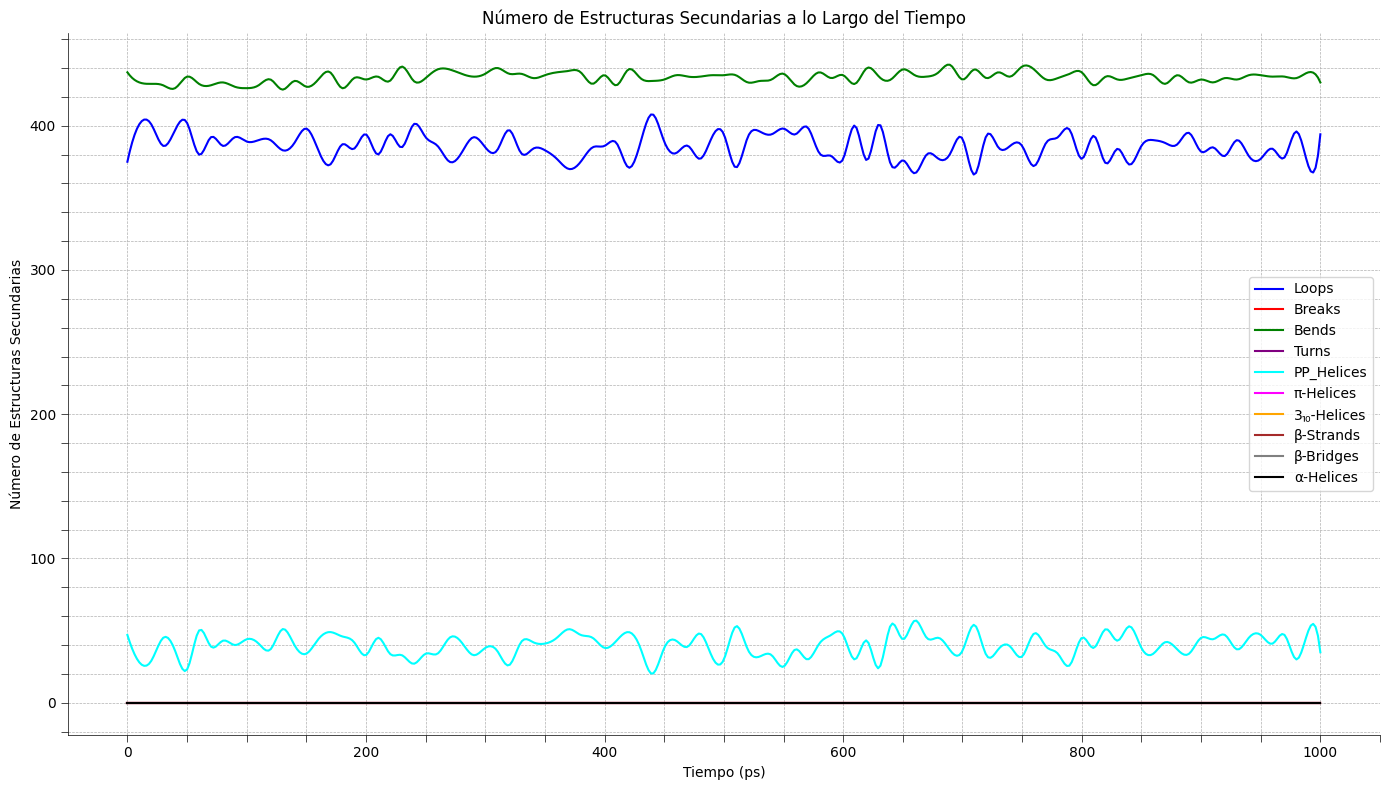

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

def leer_archivo_xvg(ruta_archivo):
    """
    Lee un archivo .xvg y extrae los datos para visualización.
    :param ruta_archivo: Ruta al archivo .xvg
    :return: Arrays de datos para el tiempo y los valores de estructuras secundarias
    """
    tiempos = []
    loops = []
    breaks = []
    bends = []
    turns = []
    pp_helices = []
    pi_helices = []
    three_10_helices = []
    beta_strands = []
    beta_bridges = []
    alpha_helices = []

    with open(ruta_archivo, 'r') as archivo:
        for linea in archivo:
            # Ignorar líneas de comentarios (líneas que comienzan con @ o #)
            if linea.startswith(('@', '#')):
                continue
            columnas = linea.split()
            tiempos.append(float(columnas[0]))
            loops.append(float(columnas[1]))
            breaks.append(float(columnas[2]))
            bends.append(float(columnas[3]))
            turns.append(float(columnas[4]))
            pp_helices.append(float(columnas[5]))
            pi_helices.append(float(columnas[6]))
            three_10_helices.append(float(columnas[7]))
            beta_strands.append(float(columnas[8]))
            beta_bridges.append(float(columnas[9]))
            alpha_helices.append(float(columnas[10]))

    return (np.array(tiempos), np.array(loops), np.array(breaks), np.array(bends),
            np.array(turns), np.array(pp_helices), np.array(pi_helices),
            np.array(three_10_helices), np.array(beta_strands), np.array(beta_bridges),
            np.array(alpha_helices))

def suavizar_datos(tiempos, datos):
    """
    Suaviza los datos utilizando interpolación cúbica.
    :param tiempos: Array de tiempos
    :param datos: Array de datos a suavizar
    :return: Arrays de tiempos y datos suavizados
    """
    tiempos_suavizados = np.linspace(tiempos.min(), tiempos.max(), 500)  # Crear más puntos en el tiempo para suavizar
    datos_suavizados = make_interp_spline(tiempos, datos, k=3)(tiempos_suavizados)  # Interpolación cúbica

    return tiempos_suavizados, datos_suavizados

def graficar_datos(tiempos, loops, breaks, bends, turns, pp_helices, pi_helices,
                   three_10_helices, beta_strands, beta_bridges, alpha_helices):
    """
    Crea un gráfico de las estructuras secundarias extraídas del archivo .xvg.
    :param tiempos: Array de tiempos
    :param loops: Array de Loops
    :param breaks: Array de Breaks
    :param bends: Array de Bends
    :param turns: Array de Turns
    :param pp_helices: Array de PP_Helices
    :param pi_helices: Array de π-Helices
    :param three_10_helices: Array de 3⏨-Helices
    :param beta_strands: Array de β-Strands
    :param beta_bridges: Array de β-Bridges
    :param alpha_helices: Array de α-Helices
    """
    plt.figure(figsize=(14, 8))

    # Suavizar datos
    tiempos_suavizados, loops_suavizado = suavizar_datos(tiempos, loops)
    _, breaks_suavizado = suavizar_datos(tiempos, breaks)
    _, bends_suavizado = suavizar_datos(tiempos, bends)
    _, turns_suavizado = suavizar_datos(tiempos, turns)
    _, pp_helices_suavizado = suavizar_datos(tiempos, pp_helices)
    _, pi_helices_suavizado = suavizar_datos(tiempos, pi_helices)
    _, three_10_helices_suavizado = suavizar_datos(tiempos, three_10_helices)
    _, beta_strands_suavizado = suavizar_datos(tiempos, beta_strands)
    _, beta_bridges_suavizado = suavizar_datos(tiempos, beta_bridges)
    _, alpha_helices_suavizado = suavizar_datos(tiempos, alpha_helices)

    # Graficar los datos suavizados
    plt.plot(tiempos_suavizados, loops_suavizado, label='Loops', color='blue')
    plt.plot(tiempos_suavizados, breaks_suavizado, label='Breaks', color='red')
    plt.plot(tiempos_suavizados, bends_suavizado, label='Bends', color='green')
    plt.plot(tiempos_suavizados, turns_suavizado, label='Turns', color='purple')
    plt.plot(tiempos_suavizados, pp_helices_suavizado, label='PP_Helices', color='cyan')
    plt.plot(tiempos_suavizados, pi_helices_suavizado, label='π-Helices', color='magenta')
    plt.plot(tiempos_suavizados, three_10_helices_suavizado, label='3⏨-Helices', color='orange')
    plt.plot(tiempos_suavizados, beta_strands_suavizado, label='β-Strands', color='brown')
    plt.plot(tiempos_suavizados, beta_bridges_suavizado, label='β-Bridges', color='gray')
    plt.plot(tiempos_suavizados, alpha_helices_suavizado, label='α-Helices', color='black')

    plt.title('Número de Estructuras Secundarias a lo Largo del Tiempo')
    plt.xlabel('Tiempo (ps)')
    plt.ylabel('Número de Estructuras Secundarias')
    plt.legend()

    # Quitar los cuadros divisores internos y de escala
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_linewidth(0.5)
    plt.gca().spines['bottom'].set_linewidth(0.5)

    # Configuración de la cuadrícula
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Ajustar estilo de cuadrícula
    plt.minorticks_on()  # Activar marcas menores en los ejes

    # Configuración de los ticks
    plt.tick_params(axis='both', which='both', length=5, width=0.5)  # Ticks
    plt.tick_params(axis='both', which='major', labelsize=10)  # Etiquetas de ticks

    plt.tight_layout()

    plt.show()

# Ruta al archivo .xvg
ruta_archivo = 'num.xvg'

# Leer el archivo .xvg
(tiempos, loops, breaks, bends, turns, pp_helices, pi_helices,
 three_10_helices, beta_strands, beta_bridges, alpha_helices) = leer_archivo_xvg(ruta_archivo)

# Graficar los datos
graficar_datos(tiempos, loops, breaks, bends, turns, pp_helices, pi_helices,
               three_10_helices, beta_strands, beta_bridges, alpha_helices)


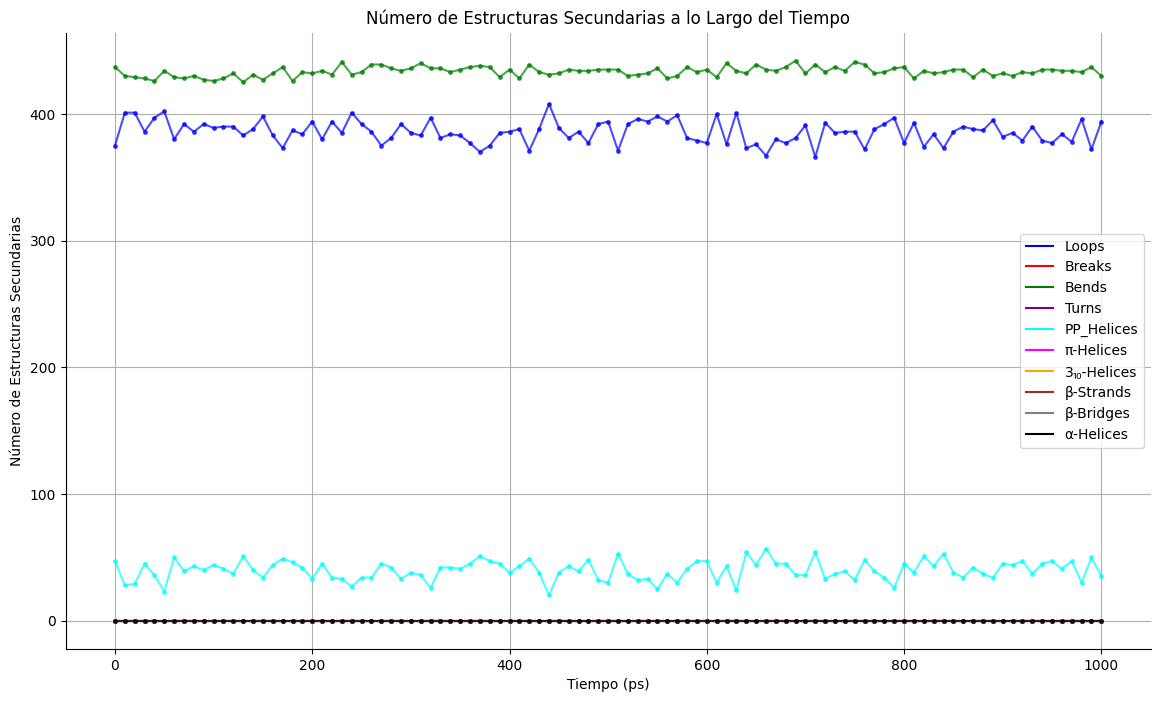

Análisis de Loops:
Promedio de Loops: 385.82
Desviación Estándar de Loops: 8.83

Análisis de Breaks:
Promedio de Breaks: 0.00
Desviación Estándar de Breaks: 0.00

Análisis de Bends:
Promedio de Bends: 433.38
Desviación Estándar de Bends: 3.73

Análisis de Turns:
Promedio de Turns: 0.00
Desviación Estándar de Turns: 0.00

Análisis de PP_Helices:
Promedio de PP_Helices: 39.80
Desviación Estándar de PP_Helices: 7.63

Análisis de π-Helices:
Promedio de π-Helices: 0.00
Desviación Estándar de π-Helices: 0.00

Análisis de 3⏨-Helices:
Promedio de 3⏨-Helices: 0.00
Desviación Estándar de 3⏨-Helices: 0.00

Análisis de β-Strands:
Promedio de β-Strands: 0.00
Desviación Estándar de β-Strands: 0.00

Análisis de β-Bridges:
Promedio de β-Bridges: 0.00
Desviación Estándar de β-Bridges: 0.00

Análisis de α-Helices:
Promedio de α-Helices: 0.00
Desviación Estándar de α-Helices: 0.00



In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Nombre del archivo .xvg
archivo_xvg = 'num.xvg'

# Leer el archivo .xvg
def leer_archivo_xvg(archivo):
    tiempos = []
    loops = []
    breaks = []
    bends = []
    turns = []
    pp_helixes = []
    pi_helixes = []
    tres_helixes = []
    beta_strands = []
    beta_bridges = []
    alfa_helixes = []

    with open(archivo, 'r') as f:
        for linea in f:
            if not linea.startswith('#') and not linea.startswith('@'):
                partes = linea.split()
                if len(partes) == 11:
                    tiempos.append(float(partes[0]))
                    loops.append(float(partes[1]))
                    breaks.append(float(partes[2]))
                    bends.append(float(partes[3]))
                    turns.append(float(partes[4]))
                    pp_helixes.append(float(partes[5]))
                    pi_helixes.append(float(partes[6]))
                    tres_helixes.append(float(partes[7]))
                    beta_strands.append(float(partes[8]))
                    beta_bridges.append(float(partes[9]))
                    alfa_helixes.append(float(partes[10]))

    return np.array(tiempos), np.array(loops), np.array(breaks), np.array(bends), np.array(turns), \
           np.array(pp_helixes), np.array(pi_helixes), np.array(tres_helixes), np.array(beta_strands), \
           np.array(beta_bridges), np.array(alfa_helixes)

# Extraer los datos
tiempos, loops, breaks, bends, turns, pp_helixes, pi_helixes, tres_helixes, beta_strands, beta_bridges, alfa_helixes = leer_archivo_xvg(archivo_xvg)

# Crear el gráfico de las estructuras secundarias
plt.figure(figsize=(14, 8))

plt.plot(tiempos, loops, label='Loops', color='blue')
plt.plot(tiempos, breaks, label='Breaks', color='red')
plt.plot(tiempos, bends, label='Bends', color='green')
plt.plot(tiempos, turns, label='Turns', color='purple')
plt.plot(tiempos, pp_helixes, label='PP_Helices', color='cyan')
plt.plot(tiempos, pi_helixes, label='π-Helices', color='magenta')
plt.plot(tiempos, tres_helixes, label='3⏨-Helices', color='orange')
plt.plot(tiempos, beta_strands, label='β-Strands', color='brown')
plt.plot(tiempos, beta_bridges, label='β-Bridges', color='gray')
plt.plot(tiempos, alfa_helixes, label='α-Helices', color='black')

plt.title('Número de Estructuras Secundarias a lo Largo del Tiempo')
plt.xlabel('Tiempo (ps)')
plt.ylabel('Número de Estructuras Secundarias')
plt.legend()
plt.grid(True)

# Suavizar las líneas de las gráficas
for line in plt.gca().get_lines():
    line.set_alpha(0.7)  # Ajustar la transparencia de las líneas
    line.set_linewidth(1.5)  # Ajustar el grosor de las líneas
    line.set_marker('.')  # Añadir un marcador para cada punto
    line.set_markersize(5)  # Ajustar el tamaño del marcador

# Eliminar las líneas divisorias de la gráfica
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Mostrar el gráfico
plt.show()

# Análisis estadístico de cada tipo de estructura secundaria
def analizar_datos(nombre_estructura, datos):
    print(f"Análisis de {nombre_estructura}:")
    print(f"Promedio de {nombre_estructura}: {np.mean(datos):.2f}")
    print(f"Desviación Estándar de {nombre_estructura}: {np.std(datos):.2f}")
    print()

# Realizar el análisis para cada tipo de estructura secundaria
analizar_datos('Loops', loops)
analizar_datos('Breaks', breaks)
analizar_datos('Bends', bends)
analizar_datos('Turns', turns)
analizar_datos('PP_Helices', pp_helixes)
analizar_datos('π-Helices', pi_helixes)
analizar_datos('3⏨-Helices', tres_helixes)
analizar_datos('β-Strands', beta_strands)
analizar_datos('β-Bridges', beta_bridges)
analizar_datos('α-Helices', alfa_helixes)


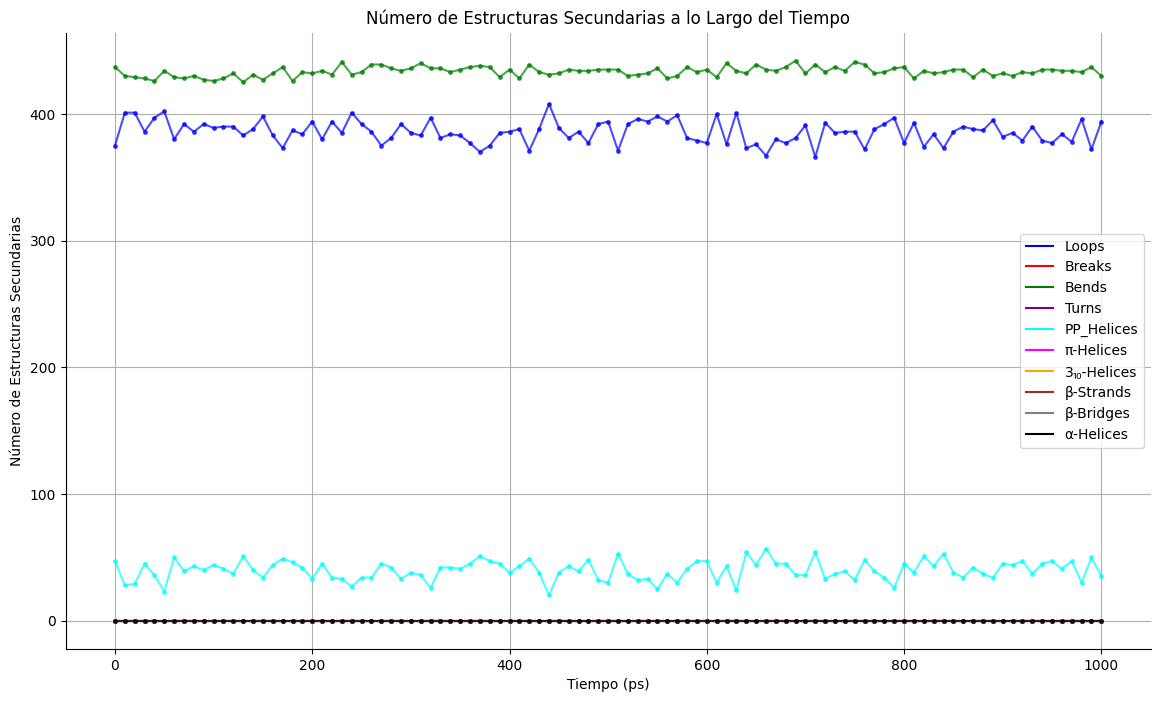

  Estructura Secundaria    Promedio  Desviación Estándar
0                 Loops  385.821782             8.828841
1                Breaks    0.000000             0.000000
2                 Bends  433.376238             3.725352
3                 Turns    0.000000             0.000000
4            PP_Helices   39.801980             7.633978
5             π-Helices    0.000000             0.000000
6            3⏨-Helices    0.000000             0.000000
7             β-Strands    0.000000             0.000000
8             β-Bridges    0.000000             0.000000
9             α-Helices    0.000000             0.000000


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Nombre del archivo .xvg
archivo_xvg = 'num.xvg'

# Leer el archivo .xvg
def leer_archivo_xvg(archivo):
    tiempos = []
    loops = []
    breaks = []
    bends = []
    turns = []
    pp_helixes = []
    pi_helixes = []
    tres_helixes = []
    beta_strands = []
    beta_bridges = []
    alfa_helixes = []

    with open(archivo, 'r') as f:
        for linea in f:
            if not linea.startswith('#') and not linea.startswith('@'):
                partes = linea.split()
                if len(partes) == 11:
                    tiempos.append(float(partes[0]))
                    loops.append(float(partes[1]))
                    breaks.append(float(partes[2]))
                    bends.append(float(partes[3]))
                    turns.append(float(partes[4]))
                    pp_helixes.append(float(partes[5]))
                    pi_helixes.append(float(partes[6]))
                    tres_helixes.append(float(partes[7]))
                    beta_strands.append(float(partes[8]))
                    beta_bridges.append(float(partes[9]))
                    alfa_helixes.append(float(partes[10]))

    return np.array(tiempos), np.array(loops), np.array(breaks), np.array(bends), np.array(turns), \
           np.array(pp_helixes), np.array(pi_helixes), np.array(tres_helixes), np.array(beta_strands), \
           np.array(beta_bridges), np.array(alfa_helixes)

# Extraer los datos
tiempos, loops, breaks, bends, turns, pp_helixes, pi_helixes, tres_helixes, beta_strands, beta_bridges, alfa_helixes = leer_archivo_xvg(archivo_xvg)

# Crear el gráfico de las estructuras secundarias
plt.figure(figsize=(14, 8))

plt.plot(tiempos, loops, label='Loops', color='blue')
plt.plot(tiempos, breaks, label='Breaks', color='red')
plt.plot(tiempos, bends, label='Bends', color='green')
plt.plot(tiempos, turns, label='Turns', color='purple')
plt.plot(tiempos, pp_helixes, label='PP_Helices', color='cyan')
plt.plot(tiempos, pi_helixes, label='π-Helices', color='magenta')
plt.plot(tiempos, tres_helixes, label='3⏨-Helices', color='orange')
plt.plot(tiempos, beta_strands, label='β-Strands', color='brown')
plt.plot(tiempos, beta_bridges, label='β-Bridges', color='gray')
plt.plot(tiempos, alfa_helixes, label='α-Helices', color='black')

plt.title('Número de Estructuras Secundarias a lo Largo del Tiempo')
plt.xlabel('Tiempo (ps)')
plt.ylabel('Número de Estructuras Secundarias')
plt.legend()
plt.grid(True)

# Suavizar las líneas de las gráficas
for line in plt.gca().get_lines():
    line.set_alpha(0.7)  # Ajustar la transparencia de las líneas
    line.set_linewidth(1.5)  # Ajustar el grosor de las líneas
    line.set_marker('.')  # Añadir un marcador para cada punto
    line.set_markersize(5)  # Ajustar el tamaño del marcador

# Eliminar las líneas divisorias de la gráfica
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Mostrar el gráfico
plt.show()

# Análisis estadístico de cada tipo de estructura secundaria
# Crear un DataFrame con los resultados
data = {
    'Estructura Secundaria': ['Loops', 'Breaks', 'Bends', 'Turns', 'PP_Helices', 'π-Helices', '3⏨-Helices', 'β-Strands', 'β-Bridges', 'α-Helices'],
    'Promedio': [np.mean(loops), np.mean(breaks), np.mean(bends), np.mean(turns), np.mean(pp_helixes), np.mean(pi_helixes), np.mean(tres_helixes), np.mean(beta_strands), np.mean(beta_bridges), np.mean(alfa_helixes)],
    'Desviación Estándar': [np.std(loops), np.std(breaks), np.std(bends), np.std(turns), np.std(pp_helixes), np.std(pi_helixes), np.std(tres_helixes), np.std(beta_strands), np.std(beta_bridges), np.std(alfa_helixes)]
}

df_estadisticas = pd.DataFrame(data)

# Mostrar la tabla con los resultados
print(df_estadisticas)

# Guardar la tabla en un archivo CSV (opcional)
df_estadisticas.to_csv('estadisticas_estructuras_secundarias.csv', index=False)


KeyError: 'π-helices'

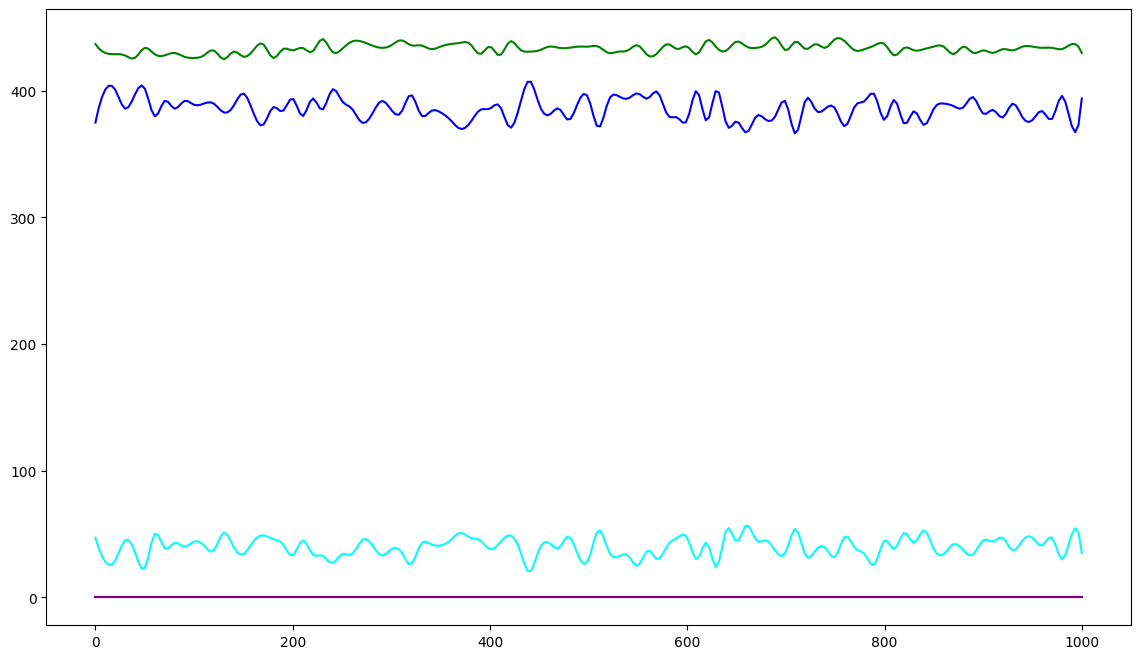

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import make_interp_spline

# Nombre del archivo .xvg
archivo_xvg = 'num.xvg'

# Leer el archivo .xvg
def leer_archivo_xvg(archivo):
    tiempos = []
    loops = []
    breaks = []
    bends = []
    turns = []
    pp_helixes = []
    pi_helixes = []
    tres_helixes = []
    beta_strands = []
    beta_bridges = []
    alfa_helixes = []

    with open(archivo, 'r') as f:
        for linea in f:
            if not linea.startswith('#') and not linea.startswith('@'):
                partes = linea.split()
                if len(partes) == 11:
                    tiempos.append(float(partes[0]))
                    loops.append(float(partes[1]))
                    breaks.append(float(partes[2]))
                    bends.append(float(partes[3]))
                    turns.append(float(partes[4]))
                    pp_helixes.append(float(partes[5]))
                    pi_helixes.append(float(partes[6]))
                    tres_helixes.append(float(partes[7]))
                    beta_strands.append(float(partes[8]))
                    beta_bridges.append(float(partes[9]))
                    alfa_helixes.append(float(partes[10]))

    return np.array(tiempos), np.array(loops), np.array(breaks), np.array(bends), np.array(turns), \
           np.array(pp_helixes), np.array(pi_helixes), np.array(tres_helixes), np.array(beta_strands), \
           np.array(beta_bridges), np.array(alfa_helixes)

# Extraer los datos
tiempos, loops, breaks, bends, turns, pp_helixes, pi_helixes, tres_helixes, beta_strands, beta_bridges, alfa_helixes = leer_archivo_xvg(archivo_xvg)

# Crear una figura para los gráficos
plt.figure(figsize=(14, 8))

# Definir colores para cada tipo de estructura secundaria
colores = {
    'Loops': 'blue',
    'Breaks': 'red',
    'Bends': 'green',
    'Turns': 'purple',
    'PP_Helices': 'cyan',
    'π-Helices': 'magenta',
    '3⏨-Helices': 'orange',
    'β-Strands': 'brown',
    'β-Bridges': 'gray',
    'α-Helices': 'black'
}

# Función para suavizar los datos
def suavizar_datos(x, y):
    x_new = np.linspace(x.min(), x.max(), 300)  # Aumentar el número de puntos para suavización
    spl = make_interp_spline(x, y, k=3)  # k=3 para suavización cúbica
    y_smooth = spl(x_new)
    return x_new, y_smooth

# Graficar las estructuras secundarias
for estructura, color in colores.items():
    y_data = locals()[estructura.lower()]
    x_smooth, y_smooth = suavizar_datos(tiempos, y_data)
    plt.plot(x_smooth, y_smooth, label=estructura, color=color)

plt.title('Número de Estructuras Secundarias a lo Largo del Tiempo')
plt.xlabel('Tiempo (ps)')
plt.ylabel('Número de Estructuras Secundarias')
plt.legend()
plt.grid(True)

# Eliminar las líneas divisorias de la gráfica
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')

# Mostrar el gráfico
plt.show()

# Análisis estadístico de cada tipo de estructura secundaria
# Crear un DataFrame con los resultados
data = {
    'Estructura Secundaria': ['Loops', 'Breaks', 'Bends', 'Turns', 'PP_Helices', 'π-Helices', '3⏨-Helices', 'β-Strands', 'β-Bridges', 'α-Helices'],
    'Promedio': [np.mean(loops), np.mean(breaks), np.mean(bends), np.mean(turns), np.mean(pp_helixes), np.mean(pi_helixes), np.mean(tres_helixes), np.mean(beta_strands), np.mean(beta_bridges), np.mean(alfa_helixes)],
    'Desviación Estándar': [np.std(loops), np.std(breaks), np.std(bends), np.std(turns), np.std(pp_helixes), np.std(pi_helixes), np.std(tres_helixes), np.std(beta_strands), np.std(beta_bridges), np.std(alfa_helixes)]
}

df_estadisticas = pd.DataFrame(data)

# Mostrar la tabla con los resultados
print(df_estadisticas)

# Guardar la tabla en un archivo CSV (opcional)
df_estadisticas.to_csv('estadisticas_estructuras_secundarias.csv', index=False)


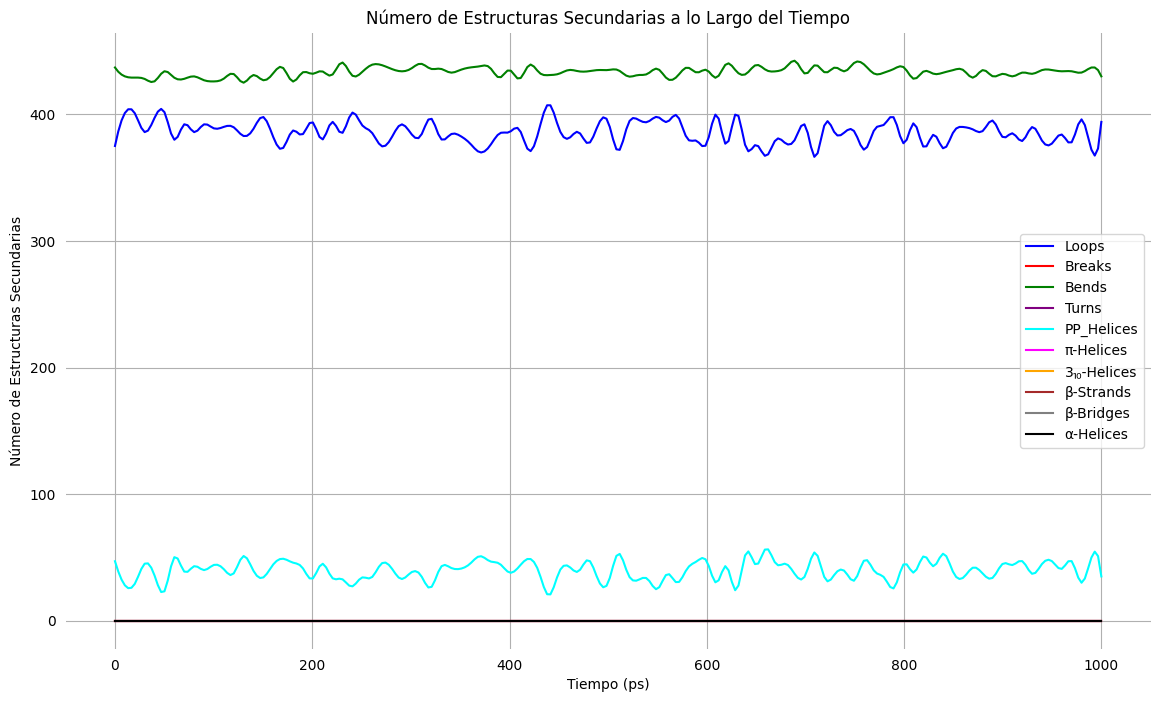

KeyError: 'loops'

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import make_interp_spline

# Nombre del archivo .xvg
archivo_xvg = 'num.xvg'

# Leer el archivo .xvg
def leer_archivo_xvg(archivo):
    tiempos = []
    loops = []
    breaks = []
    bends = []
    turns = []
    pp_helixes = []
    pi_helixes = []
    tres_helixes = []
    beta_strands = []
    beta_bridges = []
    alfa_helixes = []

    with open(archivo, 'r') as f:
        for linea in f:
            if not linea.startswith('#') and not linea.startswith('@'):
                partes = linea.split()
                if len(partes) == 11:
                    tiempos.append(float(partes[0]))
                    loops.append(float(partes[1]))
                    breaks.append(float(partes[2]))
                    bends.append(float(partes[3]))
                    turns.append(float(partes[4]))
                    pp_helixes.append(float(partes[5]))
                    pi_helixes.append(float(partes[6]))
                    tres_helixes.append(float(partes[7]))
                    beta_strands.append(float(partes[8]))
                    beta_bridges.append(float(partes[9]))
                    alfa_helixes.append(float(partes[10]))

    return np.array(tiempos), np.array(loops), np.array(breaks), np.array(bends), np.array(turns), \
           np.array(pp_helixes), np.array(pi_helixes), np.array(tres_helixes), np.array(beta_strands), \
           np.array(beta_bridges), np.array(alfa_helixes)

# Extraer los datos
tiempos, loops, breaks, bends, turns, pp_helixes, pi_helixes, tres_helixes, beta_strands, beta_bridges, alfa_helixes = leer_archivo_xvg(archivo_xvg)

# Crear una figura para los gráficos
plt.figure(figsize=(14, 8))

# Definir colores para cada tipo de estructura secundaria
colores = {
    'Loops': 'blue',
    'Breaks': 'red',
    'Bends': 'green',
    'Turns': 'purple',
    'PP_Helices': 'cyan',
    'π-Helices': 'magenta',
    '3⏨-Helices': 'orange',
    'β-Strands': 'brown',
    'β-Bridges': 'gray',
    'α-Helices': 'black'
}

# Mapeo entre nombres en el archivo y nombres en el diccionario de colores
mapeo_estructuras = {
    'loops': 'Loops',
    'breaks': 'Breaks',
    'bends': 'Bends',
    'turns': 'Turns',
    'pp_helixes': 'PP_Helices',
    'pi_helixes': 'π-Helices',
    'tres_helixes': '3⏨-Helices',
    'beta_strands': 'β-Strands',
    'beta_bridges': 'β-Bridges',
    'alfa_helixes': 'α-Helices'
}

# Función para suavizar los datos
def suavizar_datos(x, y):
    x_new = np.linspace(x.min(), x.max(), 300)  # Aumentar el número de puntos para suavización
    spl = make_interp_spline(x, y, k=3)  # k=3 para suavización cúbica
    y_smooth = spl(x_new)
    return x_new, y_smooth

# Graficar las estructuras secundarias
for estructura, color in colores.items():
    nombre_columna = [k for k, v in mapeo_estructuras.items() if v == estructura][0]
    y_data = locals()[nombre_columna]
    x_smooth, y_smooth = suavizar_datos(tiempos, y_data)
    plt.plot(x_smooth, y_smooth, label=estructura, color=color)

plt.title('Número de Estructuras Secundarias a lo Largo del Tiempo')
plt.xlabel('Tiempo (ps)')
plt.ylabel('Número de Estructuras Secundarias')
plt.legend()
plt.grid(True)

# Eliminar las líneas divisorias de la gráfica
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')

# Mostrar el gráfico
plt.show()

# Análisis estadístico de cada tipo de estructura secundaria
# Crear un DataFrame con los resultados
data = {
    'Estructura Secundaria': list(colores.keys()),
    'Promedio': [np.mean(locals()[k]) for k in mapeo_estructuras.keys()],
    'Desviación Estándar': [np.std(locals()[k]) for k in mapeo_estructuras.keys()]
}

df_estadisticas = pd.DataFrame(data)

# Mostrar la tabla con los resultados
print(df_estadisticas)

# Guardar la tabla en un archivo CSV (opcional)
df_estadisticas.to_csv('estadisticas_estructuras_secundarias.csv', index=False)


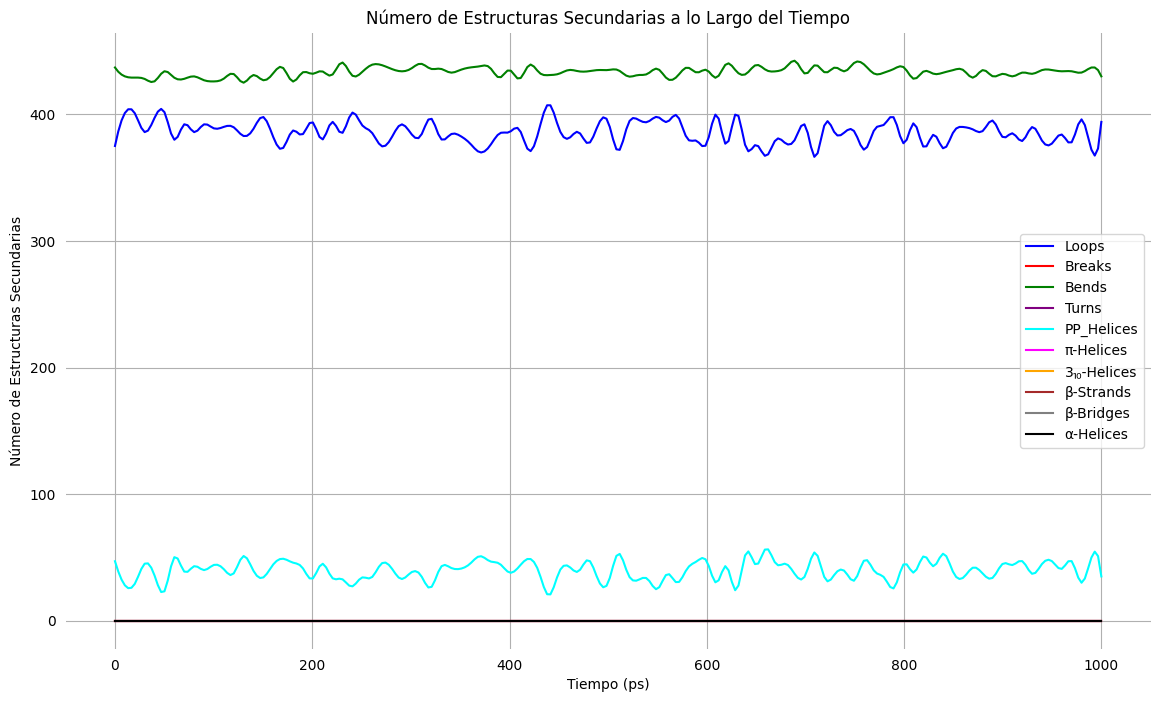

KeyError: 'Loops'

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import make_interp_spline

# Nombre del archivo .xvg
archivo_xvg = 'num.xvg'

# Leer el archivo .xvg
def leer_archivo_xvg(archivo):
    tiempos = []
    loops = []
    breaks = []
    bends = []
    turns = []
    pp_helixes = []
    pi_helixes = []
    tres_helixes = []
    beta_strands = []
    beta_bridges = []
    alfa_helixes = []

    with open(archivo, 'r') as f:
        for linea in f:
            if not linea.startswith('#') and not linea.startswith('@'):
                partes = linea.split()
                if len(partes) == 11:
                    tiempos.append(float(partes[0]))
                    loops.append(float(partes[1]))
                    breaks.append(float(partes[2]))
                    bends.append(float(partes[3]))
                    turns.append(float(partes[4]))
                    pp_helixes.append(float(partes[5]))
                    pi_helixes.append(float(partes[6]))
                    tres_helixes.append(float(partes[7]))
                    beta_strands.append(float(partes[8]))
                    beta_bridges.append(float(partes[9]))
                    alfa_helixes.append(float(partes[10]))

    return np.array(tiempos), np.array(loops), np.array(breaks), np.array(bends), np.array(turns), \
           np.array(pp_helixes), np.array(pi_helixes), np.array(tres_helixes), np.array(beta_strands), \
           np.array(beta_bridges), np.array(alfa_helixes)

# Extraer los datos
tiempos, loops, breaks, bends, turns, pp_helixes, pi_helixes, tres_helixes, beta_strands, beta_bridges, alfa_helixes = leer_archivo_xvg(archivo_xvg)

# Crear una figura para los gráficos
plt.figure(figsize=(14, 8))

# Definir colores para cada tipo de estructura secundaria
colores = {
    'Loops': 'blue',
    'Breaks': 'red',
    'Bends': 'green',
    'Turns': 'purple',
    'PP_Helices': 'cyan',
    'π-Helices': 'magenta',
    '3⏨-Helices': 'orange',
    'β-Strands': 'brown',
    'β-Bridges': 'gray',
    'α-Helices': 'black'
}

# Mapeo entre nombres en el archivo y nombres en el diccionario de colores
mapeo_estructuras = {
    'loops': 'Loops',
    'breaks': 'Breaks',
    'bends': 'Bends',
    'turns': 'Turns',
    'pp_helixes': 'PP_Helices',
    'pi_helixes': 'π-Helices',
    'tres_helixes': '3⏨-Helices',
    'beta_strands': 'β-Strands',
    'beta_bridges': 'β-Bridges',
    'alfa_helixes': 'α-Helices'
}

# Función para suavizar los datos
def suavizar_datos(x, y):
    x_new = np.linspace(x.min(), x.max(), 300)  # Aumentar el número de puntos para suavización
    spl = make_interp_spline(x, y, k=3)  # k=3 para suavización cúbica
    y_smooth = spl(x_new)
    return x_new, y_smooth

# Graficar las estructuras secundarias
for estructura, color in colores.items():
    nombre_columna = [k for k, v in mapeo_estructuras.items() if v == estructura][0]
    y_data = locals()[nombre_columna.lower()]
    x_smooth, y_smooth = suavizar_datos(tiempos, y_data)
    plt.plot(x_smooth, y_smooth, label=estructura, color=color)

plt.title('Número de Estructuras Secundarias a lo Largo del Tiempo')
plt.xlabel('Tiempo (ps)')
plt.ylabel('Número de Estructuras Secundarias')
plt.legend()
plt.grid(True)

# Eliminar las líneas divisorias de la gráfica
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')

# Mostrar el gráfico
plt.show()

# Análisis estadístico de cada tipo de estructura secundaria
# Crear un DataFrame con los resultados
data = {
    'Estructura Secundaria': list(colores.keys()),
    'Promedio': [np.mean(locals()[mapeo_estructuras[k].lower()]) for k in colores.keys()],
    'Desviación Estándar': [np.std(locals()[mapeo_estructuras[k].lower()]) for k in colores.keys()]
}

df_estadisticas = pd.DataFrame(data)

# Mostrar la tabla con los resultados
print(df_estadisticas)

# Guardar la tabla en un archivo CSV (opcional)
df_estadisticas.to_csv('estadisticas_estructuras_secundarias.csv', index=False)


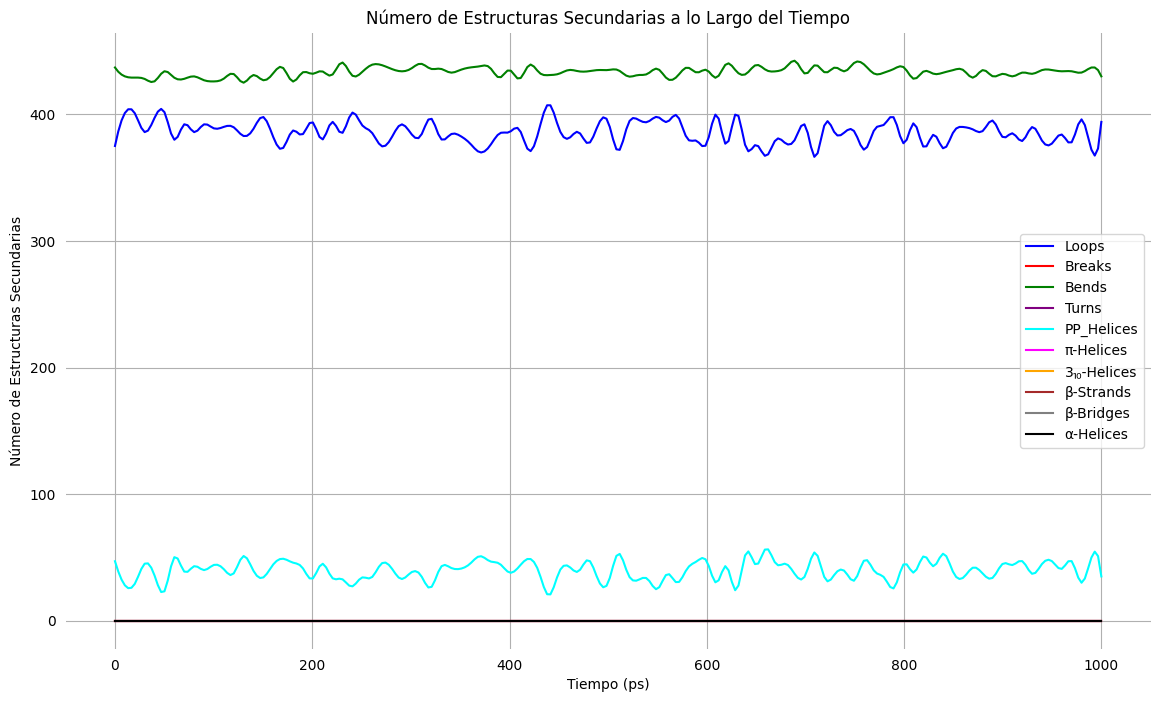

  Estructura Secundaria    Promedio  Desviación Estándar
0                 Loops  385.821782             8.828841
1                Breaks    0.000000             0.000000
2                 Bends  433.376238             3.725352
3                 Turns    0.000000             0.000000
4            PP_Helices   39.801980             7.633978
5             π-Helices    0.000000             0.000000
6            3⏨-Helices    0.000000             0.000000
7             β-Strands    0.000000             0.000000
8             β-Bridges    0.000000             0.000000
9             α-Helices    0.000000             0.000000


In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import make_interp_spline

# Nombre del archivo .xvg
archivo_xvg = 'num.xvg'

# Leer el archivo .xvg
def leer_archivo_xvg(archivo):
    tiempos = []
    loops = []
    breaks = []
    bends = []
    turns = []
    pp_helixes = []
    pi_helixes = []
    tres_helixes = []
    beta_strands = []
    beta_bridges = []
    alfa_helixes = []

    with open(archivo, 'r') as f:
        for linea in f:
            if not linea.startswith('#') and not linea.startswith('@'):
                partes = linea.split()
                if len(partes) == 11:
                    tiempos.append(float(partes[0]))
                    loops.append(float(partes[1]))
                    breaks.append(float(partes[2]))
                    bends.append(float(partes[3]))
                    turns.append(float(partes[4]))
                    pp_helixes.append(float(partes[5]))
                    pi_helixes.append(float(partes[6]))
                    tres_helixes.append(float(partes[7]))
                    beta_strands.append(float(partes[8]))
                    beta_bridges.append(float(partes[9]))
                    alfa_helixes.append(float(partes[10]))

    return np.array(tiempos), np.array(loops), np.array(breaks), np.array(bends), np.array(turns), \
           np.array(pp_helixes), np.array(pi_helixes), np.array(tres_helixes), np.array(beta_strands), \
           np.array(beta_bridges), np.array(alfa_helixes)

# Extraer los datos
tiempos, loops, breaks, bends, turns, pp_helixes, pi_helixes, tres_helixes, beta_strands, beta_bridges, alfa_helixes = leer_archivo_xvg(archivo_xvg)

# Crear una figura para los gráficos
plt.figure(figsize=(14, 8))

# Definir colores para cada tipo de estructura secundaria
colores = {
    'Loops': 'blue',
    'Breaks': 'red',
    'Bends': 'green',
    'Turns': 'purple',
    'PP_Helices': 'cyan',
    'π-Helices': 'magenta',
    '3⏨-Helices': 'orange',
    'β-Strands': 'brown',
    'β-Bridges': 'gray',
    'α-Helices': 'black'
}

# Mapeo entre nombres en el archivo y nombres en el diccionario de colores
datos_estructuras = {
    'Loops': loops,
    'Breaks': breaks,
    'Bends': bends,
    'Turns': turns,
    'PP_Helices': pp_helixes,
    'π-Helices': pi_helixes,
    '3⏨-Helices': tres_helixes,
    'β-Strands': beta_strands,
    'β-Bridges': beta_bridges,
    'α-Helices': alfa_helixes
}

# Función para suavizar los datos
def suavizar_datos(x, y):
    x_new = np.linspace(x.min(), x.max(), 300)  # Aumentar el número de puntos para suavización
    spl = make_interp_spline(x, y, k=3)  # k=3 para suavización cúbica
    y_smooth = spl(x_new)
    return x_new, y_smooth

# Graficar las estructuras secundarias
for estructura, color in colores.items():
    y_data = datos_estructuras[estructura]
    x_smooth, y_smooth = suavizar_datos(tiempos, y_data)
    plt.plot(x_smooth, y_smooth, label=estructura, color=color)

plt.title('Número de Estructuras Secundarias a lo Largo del Tiempo')
plt.xlabel('Tiempo (ps)')
plt.ylabel('Número de Estructuras Secundarias')
plt.legend()
plt.grid(True)

# Eliminar las líneas divisorias de la gráfica
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')

# Mostrar el gráfico
plt.show()

# Análisis estadístico de cada tipo de estructura secundaria
# Crear un DataFrame con los resultados
data = {
    'Estructura Secundaria': list(colores.keys()),
    'Promedio': [np.mean(datos_estructuras[k]) for k in colores.keys()],
    'Desviación Estándar': [np.std(datos_estructuras[k]) for k in colores.keys()]
}

df_estadisticas = pd.DataFrame(data)

# Mostrar la tabla con los resultados
print(df_estadisticas)

# Guardar la tabla en un archivo CSV (opcional)
df_estadisticas.to_csv('estadisticas_estructuras_secundarias.csv', index=False)


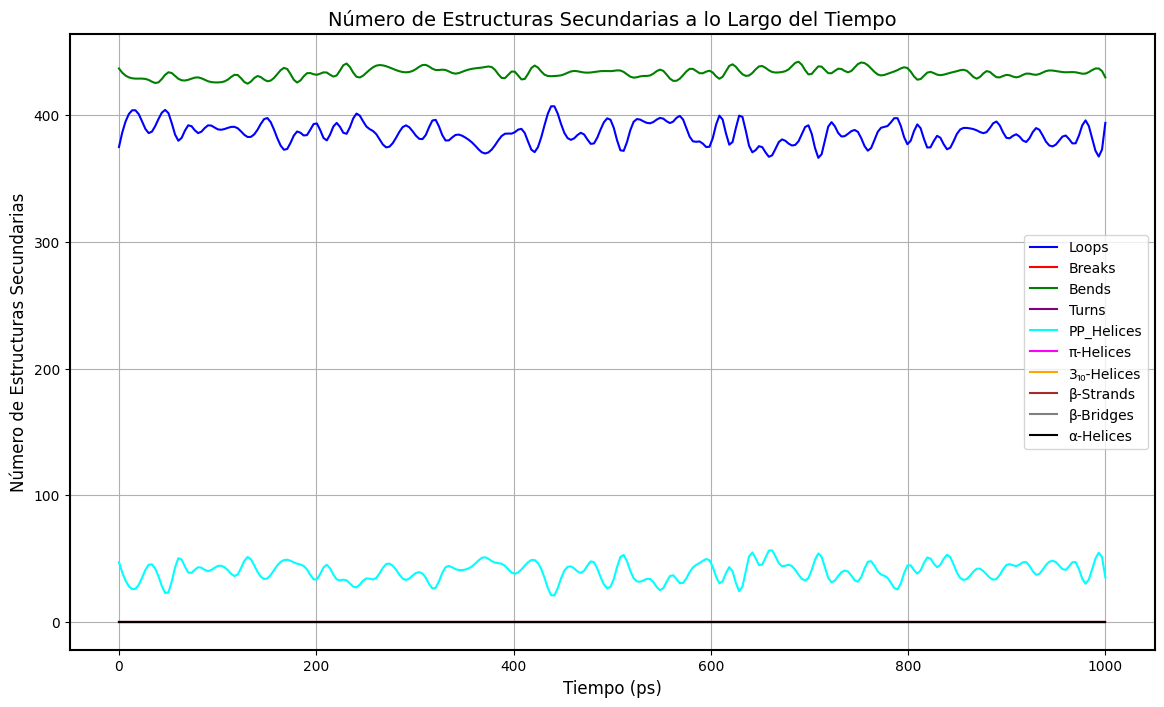

  Estructura Secundaria    Promedio  Desviación Estándar
0                 Loops  385.821782             8.828841
1                Breaks    0.000000             0.000000
2                 Bends  433.376238             3.725352
3                 Turns    0.000000             0.000000
4            PP_Helices   39.801980             7.633978
5             π-Helices    0.000000             0.000000
6            3⏨-Helices    0.000000             0.000000
7             β-Strands    0.000000             0.000000
8             β-Bridges    0.000000             0.000000
9             α-Helices    0.000000             0.000000


In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import make_interp_spline

# Nombre del archivo .xvg
archivo_xvg = 'num.xvg'

# Leer el archivo .xvg
def leer_archivo_xvg(archivo):
    tiempos = []
    loops = []
    breaks = []
    bends = []
    turns = []
    pp_helixes = []
    pi_helixes = []
    tres_helixes = []
    beta_strands = []
    beta_bridges = []
    alfa_helixes = []

    with open(archivo, 'r') as f:
        for linea in f:
            if not linea.startswith('#') and not linea.startswith('@'):
                partes = linea.split()
                if len(partes) == 11:
                    tiempos.append(float(partes[0]))
                    loops.append(float(partes[1]))
                    breaks.append(float(partes[2]))
                    bends.append(float(partes[3]))
                    turns.append(float(partes[4]))
                    pp_helixes.append(float(partes[5]))
                    pi_helixes.append(float(partes[6]))
                    tres_helixes.append(float(partes[7]))
                    beta_strands.append(float(partes[8]))
                    beta_bridges.append(float(partes[9]))
                    alfa_helixes.append(float(partes[10]))

    return np.array(tiempos), np.array(loops), np.array(breaks), np.array(bends), np.array(turns), \
           np.array(pp_helixes), np.array(pi_helixes), np.array(tres_helixes), np.array(beta_strands), \
           np.array(beta_bridges), np.array(alfa_helixes)

# Extraer los datos
tiempos, loops, breaks, bends, turns, pp_helixes, pi_helixes, tres_helixes, beta_strands, beta_bridges, alfa_helixes = leer_archivo_xvg(archivo_xvg)

# Crear una figura para los gráficos
plt.figure(figsize=(14, 8))

# Definir colores para cada tipo de estructura secundaria
colores = {
    'Loops': 'blue',
    'Breaks': 'red',
    'Bends': 'green',
    'Turns': 'purple',
    'PP_Helices': 'cyan',
    'π-Helices': 'magenta',
    '3⏨-Helices': 'orange',
    'β-Strands': 'brown',
    'β-Bridges': 'gray',
    'α-Helices': 'black'
}

# Mapeo entre nombres en el archivo y nombres en el diccionario de colores
datos_estructuras = {
    'Loops': loops,
    'Breaks': breaks,
    'Bends': bends,
    'Turns': turns,
    'PP_Helices': pp_helixes,
    'π-Helices': pi_helixes,
    '3⏨-Helices': tres_helixes,
    'β-Strands': beta_strands,
    'β-Bridges': beta_bridges,
    'α-Helices': alfa_helixes
}

# Función para suavizar los datos
def suavizar_datos(x, y):
    x_new = np.linspace(x.min(), x.max(), 300)  # Aumentar el número de puntos para suavización
    spl = make_interp_spline(x, y, k=3)  # k=3 para suavización cúbica
    y_smooth = spl(x_new)
    return x_new, y_smooth

# Graficar las estructuras secundarias
for estructura, color in colores.items():
    y_data = datos_estructuras[estructura]
    x_smooth, y_smooth = suavizar_datos(tiempos, y_data)
    plt.plot(x_smooth, y_smooth, label=estructura, color=color)

plt.title('Número de Estructuras Secundarias a lo Largo del Tiempo', fontsize=14)
plt.xlabel('Tiempo (ps)', fontsize=12)
plt.ylabel('Número de Estructuras Secundarias', fontsize=12)
plt.legend()
plt.grid(True)

# Eliminar las líneas divisorias de la gráfica y definir bordes
ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Ajustar la visualización de los ejes
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Mostrar el gráfico
plt.show()

# Análisis estadístico de cada tipo de estructura secundaria
# Crear un DataFrame con los resultados
data = {
    'Estructura Secundaria': list(colores.keys()),
    'Promedio': [np.mean(datos_estructuras[k]) for k in colores.keys()],
    'Desviación Estándar': [np.std(datos_estructuras[k]) for k in colores.keys()]
}

df_estadisticas = pd.DataFrame(data)

# Mostrar la tabla con los resultados
print(df_estadisticas)

# Guardar la tabla en un archivo CSV (opcional)
df_estadisticas.to_csv('estadisticas_estructuras_secundarias.csv', index=False)


Divisores posibles: [1, 101, 859, 86759]
Matriz generada con dimensiones: 859 filas x 101 columnas
[[2 2 2 ... 2 2 2]
 [2 0 0 ... 2 2 2]
 [2 2 2 ... 0 2 2]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 2 ... 2 0 0]
 [2 2 2 ... 2 2 2]]
El archivo en tiempo.txt no se encontró. Se usará un tiempo total estimado.


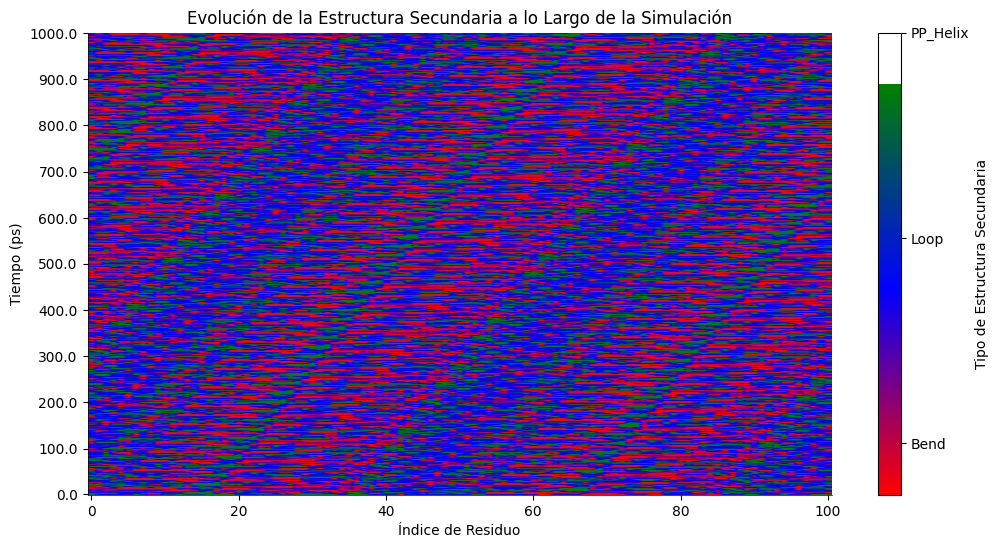

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.colors import LinearSegmentedColormap

# Cargar los datos del archivo de estructuras secundarias
file_path = 'sec_struct.dat'

try:
    with open(file_path, 'r') as file:
        data_str = file.read().replace('\n', '')  # Leer todo el archivo en una sola cadena
except FileNotFoundError:
    raise FileNotFoundError(f'El archivo en {file_path} no se encontró.')

# Crear un diccionario de mapeo de caracteres a números
# Definimos los colores para cada tipo de estructura secundaria
mapping = {
    'S': 0,  # Bend
    'P': 1,  # Loop
    '~': 2   # PP_Helix
}

# Convertir los caracteres en números usando el diccionario de mapeo
data_numeric = [mapping.get(char, -1) for char in data_str]  # Usa -1 para caracteres desconocidos

# Determinar la longitud total de caracteres
total_chars = len(data_numeric)

# Encontrar todos los divisores de la longitud total de caracteres
def find_divisors(n):
    divisors = set()
    for i in range(1, int(math.sqrt(n)) + 1):
        if n % i == 0:
            divisors.add(i)
            divisors.add(n // i)
    return sorted(divisors)

divisors = find_divisors(total_chars)
print("Divisores posibles:", divisors)

# Seleccionar un divisor adecuado (por ejemplo, el segundo más grande para tener una forma más visualizable)
if len(divisors) > 1:
    n_filas = divisors[-2]  # Usamos el segundo divisor más grande
else:
    n_filas = divisors[0]  # Solo hay un divisor, lo usamos

# Dividir los datos en una matriz 2D
data_array = np.array(data_numeric)
data_matrix = data_array.reshape(n_filas, -1)

print(f'Matriz generada con dimensiones: {data_matrix.shape[0]} filas x {data_matrix.shape[1]} columnas')
print(data_matrix)

# Crear una lista de colores para cada tipo de estructura secundaria
# Usamos una paleta de colores personalizada para cada tipo de estructura secundaria
colors = ['red', 'blue', 'green']  # Rojo para Bend, Azul para Loop, Verde para PP_Helix

# Crear el mapa de colores usando `LinearSegmentedColormap`
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

# Crear un array de tiempo para el eje Y (debe ajustarse a los tiempos reales de tu simulación)
# Aquí asumimos que el tiempo es uniforme y aumenta de 0 en adelante
# Cambia esta línea si tienes un archivo de tiempo real o datos de tiempo específicos
file_path_tiempo = 'tiempo.txt'  # Cambia este nombre si tu archivo de tiempos tiene otro nombre

try:
    with open(file_path_tiempo, 'r') as file:
        tiempos = np.array([float(line.strip()) for line in file])
except FileNotFoundError:
    print(f'El archivo en {file_path_tiempo} no se encontró. Se usará un tiempo total estimado.')
    tiempo_maximo = 1000  # Ajusta este valor según el tiempo total de la simulación
    tiempos = np.linspace(0, tiempo_maximo, n_filas)

# Asegúrate de que `tiempos` tiene la misma longitud que `n_filas`
if len(tiempos) != n_filas:
    raise ValueError(f'El número de tiempos en {file_path_tiempo} no coincide con el número de filas en la matriz de datos.')

# Graficar los datos
plt.figure(figsize=(12, 6))
plt.imshow(data_matrix, cmap=cmap, origin='lower', aspect='auto')

# Añadir una barra de color para la leyenda
cbar = plt.colorbar(ticks=[0, 1, 2])
cbar.set_label('Tipo de Estructura Secundaria')
cbar.set_ticks([0.25, 1.25, 2.25])
cbar.set_ticklabels(['Bend', 'Loop', 'PP_Helix'])

plt.title('Evolución de la Estructura Secundaria a lo Largo de la Simulación')
plt.xlabel('Índice de Residuo')
plt.ylabel('Tiempo (ps)')  # Etiqueta del eje Y

# Ajustar el eje Y para que muestre el tiempo en lugar del número de frame
# Mostrar etiquetas cada 100 ps
ticks_tiempo = np.arange(0, tiempos[-1] + 100, 100)
ticks_filas = np.linspace(0, n_filas - 1, len(ticks_tiempo), dtype=int)
plt.yticks(ticks=ticks_filas, labels=ticks_tiempo)

# Ajustar los bordes de la gráfica
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)

# Mostrar la gráfica
plt.show()


Número total de residuos: 86759
Divisores posibles: [1, 101, 859, 86759]
Matriz generada con dimensiones: 86759 filas x 1 columnas
[[2]
 [2]
 [2]
 ...
 [2]
 [2]
 [2]]
El archivo en tiempo.txt no se encontró. Se usará un tiempo total estimado.


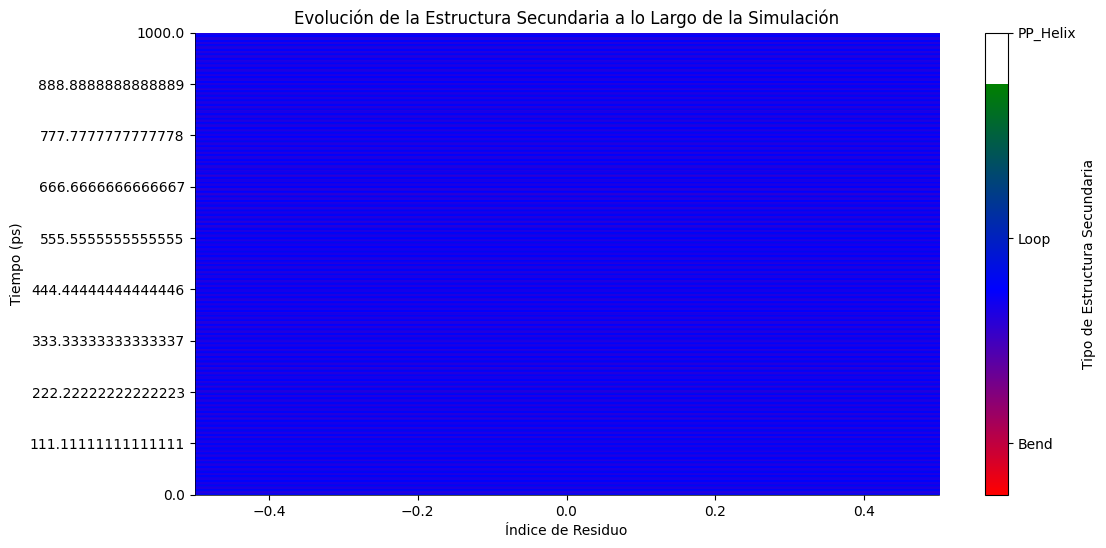

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.colors import LinearSegmentedColormap

# Cargar los datos del archivo de estructuras secundarias
file_path = 'sec_struct.dat'

try:
    with open(file_path, 'r') as file:
        data_str = file.read().replace('\n', '')  # Leer todo el archivo en una sola cadena
except FileNotFoundError:
    raise FileNotFoundError(f'El archivo en {file_path} no se encontró.')

# Crear un diccionario de mapeo de caracteres a números
# Definimos los colores para cada tipo de estructura secundaria
mapping = {
    'S': 0,  # Bend (Hélice Alfa)
    'P': 1,  # Loop (Pliegue Beta)
    '~': 2   # PP_Helix (Bucle)
}

# Convertir los caracteres en números usando el diccionario de mapeo
data_numeric = [mapping.get(char, -1) for char in data_str]  # Usa -1 para caracteres desconocidos

# Determinar la longitud total de caracteres
total_chars = len(data_numeric)
print(f'Número total de residuos: {total_chars}')

# Encontrar todos los divisores de la longitud total de caracteres
def find_divisors(n):
    divisors = set()
    for i in range(1, int(math.sqrt(n)) + 1):
        if n % i == 0:
            divisors.add(i)
            divisors.add(n // i)
    return sorted(divisors)

divisors = find_divisors(total_chars)
print("Divisores posibles:", divisors)

# Seleccionar un divisor adecuado (por ejemplo, el más grande para mantener una visualización adecuada)
n_filas = divisors[-1]  # Usamos el divisor más grande para que la matriz sea ancha
n_columnas = total_chars // n_filas

# Dividir los datos en una matriz 2D
data_array = np.array(data_numeric)
data_matrix = data_array.reshape(n_filas, n_columnas)

print(f'Matriz generada con dimensiones: {data_matrix.shape[0]} filas x {data_matrix.shape[1]} columnas')
print(data_matrix)

# Crear una lista de colores para cada tipo de estructura secundaria
# Usamos una paleta de colores personalizada para cada tipo de estructura secundaria
colors = ['red', 'blue', 'green']  # Rojo para Bend, Azul para Loop, Verde para PP_Helix

# Crear el mapa de colores usando `LinearSegmentedColormap`
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

# Crear un array de tiempo para el eje Y (debe ajustarse a los tiempos reales de tu simulación)
# Aquí asumimos que el tiempo es uniforme y aumenta de 0 en adelante
# Cambia esta línea si tienes un archivo de tiempo real o datos de tiempo específicos
file_path_tiempo = 'tiempo.txt'  # Cambia este nombre si tu archivo de tiempos tiene otro nombre

try:
    with open(file_path_tiempo, 'r') as file:
        tiempos = np.array([float(line.strip()) for line in file])
except FileNotFoundError:
    print(f'El archivo en {file_path_tiempo} no se encontró. Se usará un tiempo total estimado.')
    tiempo_maximo = 1000  # Ajusta este valor según el tiempo total de la simulación
    tiempos = np.linspace(0, tiempo_maximo, n_filas)

# Asegúrate de que `tiempos` tiene la misma longitud que `n_filas`
if len(tiempos) != n_filas:
    raise ValueError(f'El número de tiempos en {file_path_tiempo} no coincide con el número de filas en la matriz de datos.')

# Graficar los datos
plt.figure(figsize=(12, 6))
plt.imshow(data_matrix, cmap=cmap, origin='lower', aspect='auto')

# Añadir una barra de color para la leyenda
cbar = plt.colorbar(ticks=[0, 1, 2])
cbar.set_label('Tipo de Estructura Secundaria')
cbar.set_ticks([0.25, 1.25, 2.25])
cbar.set_ticklabels(['Bend', 'Loop', 'PP_Helix'])

plt.title('Evolución de la Estructura Secundaria a lo Largo de la Simulación')
plt.xlabel('Índice de Residuo')
plt.ylabel('Tiempo (ps)')  # Etiqueta del eje Y

# Ajustar el eje Y para que muestre el tiempo en lugar del número de frame
# Mostrar etiquetas cada 100 ps, ajustar para que coincida con el tamaño de tu datos
# Mostrar todas las etiquetas del eje Y en función del número total de filas
plt.yticks(ticks=np.linspace(0, n_filas - 1, min(n_filas, 10), dtype=int),
           labels=np.linspace(0, tiempos[-1], min(n_filas, 10)))

# Ajustar los bordes de la gráfica
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)

# Mostrar la gráfica
plt.show()


Número total de residuos: 86759
Matriz generada con dimensiones: 867 filas x 100 columnas
[[2 2 2 ... 0 2 2]
 [2 2 0 ... 2 2 2]
 [2 2 2 ... 2 0 0]
 ...
 [0 0 0 ... 2 1 1]
 [1 2 0 ... 2 2 2]
 [2 2 2 ... 0 0 2]]
El archivo en tiempo.txt no se encontró. Se usará un tiempo total estimado.


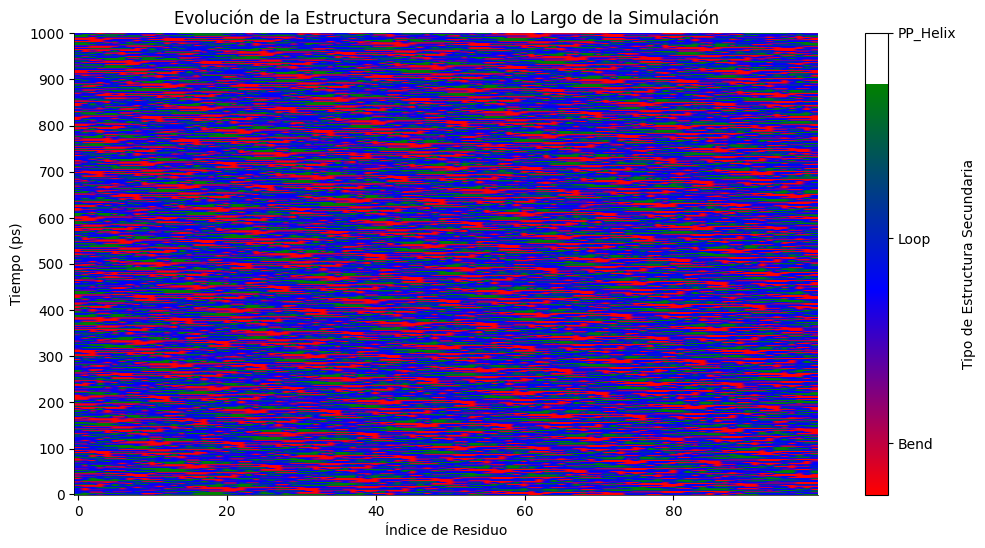

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.colors import LinearSegmentedColormap

# Cargar los datos del archivo de estructuras secundarias
file_path = 'sec_struct.dat'

try:
    with open(file_path, 'r') as file:
        data_str = file.read().replace('\n', '')  # Leer todo el archivo en una sola cadena
except FileNotFoundError:
    raise FileNotFoundError(f'El archivo en {file_path} no se encontró.')

# Crear un diccionario de mapeo de caracteres a números
# Definimos los colores para cada tipo de estructura secundaria
mapping = {
    'S': 0,  # Bend (Hélice Alfa)
    'P': 1,  # Loop (Pliegue Beta)
    '~': 2   # PP_Helix (Bucle)
}

# Convertir los caracteres en números usando el diccionario de mapeo
data_numeric = [mapping.get(char, -1) for char in data_str]  # Usa -1 para caracteres desconocidos

# Determinar la longitud total de caracteres
total_chars = len(data_numeric)
print(f'Número total de residuos: {total_chars}')

# Seleccionar el número de residuos a mostrar
residuos_por_pantalla = 100
tiempos_totales = 1000  # Tiempo total en ps para mostrar
intervalo_tiempo = 100  # Intervalo de tiempo en ps entre etiquetas del eje Y

# Determinar el número de filas en la matriz de datos
n_filas = total_chars // residuos_por_pantalla
n_columnas = residuos_por_pantalla

# Dividir los datos en una matriz 2D
data_array = np.array(data_numeric[:n_filas * n_columnas])
data_matrix = data_array.reshape(n_filas, n_columnas)

print(f'Matriz generada con dimensiones: {data_matrix.shape[0]} filas x {data_matrix.shape[1]} columnas')
print(data_matrix)

# Crear una lista de colores para cada tipo de estructura secundaria
# Usamos una paleta de colores personalizada para cada tipo de estructura secundaria
colors = ['red', 'blue', 'green']  # Rojo para Bend, Azul para Loop, Verde para PP_Helix

# Crear el mapa de colores usando `LinearSegmentedColormap`
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

# Crear un array de tiempo para el eje Y (debe ajustarse a los tiempos reales de tu simulación)
# Aquí asumimos que el tiempo es uniforme y aumenta de 0 en adelante
# Cambia esta línea si tienes un archivo de tiempo real o datos de tiempo específicos
file_path_tiempo = 'tiempo.txt'  # Cambia este nombre si tu archivo de tiempos tiene otro nombre

try:
    with open(file_path_tiempo, 'r') as file:
        tiempos = np.array([float(line.strip()) for line in file])
except FileNotFoundError:
    print(f'El archivo en {file_path_tiempo} no se encontró. Se usará un tiempo total estimado.')
    tiempos = np.linspace(0, tiempos_totales, n_filas)

# Asegúrate de que `tiempos` tiene la misma longitud que `n_filas`
if len(tiempos) != n_filas:
    raise ValueError(f'El número de tiempos en {file_path_tiempo} no coincide con el número de filas en la matriz de datos.')

# Graficar los datos
plt.figure(figsize=(12, 6))
plt.imshow(data_matrix, cmap=cmap, origin='lower', aspect='auto')

# Añadir una barra de color para la leyenda
cbar = plt.colorbar(ticks=[0, 1, 2])
cbar.set_label('Tipo de Estructura Secundaria')
cbar.set_ticks([0.25, 1.25, 2.25])
cbar.set_ticklabels(['Bend', 'Loop', 'PP_Helix'])

plt.title('Evolución de la Estructura Secundaria a lo Largo de la Simulación')
plt.xlabel('Índice de Residuo')
plt.ylabel('Tiempo (ps)')  # Etiqueta del eje Y

# Ajustar el eje Y para que muestre el tiempo en lugar del número de frame
# Mostrar etiquetas cada 100 ps
ticks_tiempo = np.arange(0, tiempos_totales + intervalo_tiempo, intervalo_tiempo)
ticks_filas = np.linspace(0, n_filas - 1, len(ticks_tiempo), dtype=int)
plt.yticks(ticks=ticks_filas, labels=ticks_tiempo)

# Ajustar los bordes de la gráfica
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)

# Mostrar la gráfica
plt.show()


Número total de residuos: 86759
Matriz generada con dimensiones: 867 filas x 100 columnas
[[2 2 2 ... 0 2 2]
 [2 2 0 ... 2 2 2]
 [2 2 2 ... 2 0 0]
 ...
 [0 0 0 ... 2 1 1]
 [1 2 0 ... 2 2 2]
 [2 2 2 ... 0 0 2]]
El archivo en tiempo.txt no se encontró. Se usará un tiempo total estimado.


ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of labels (100).

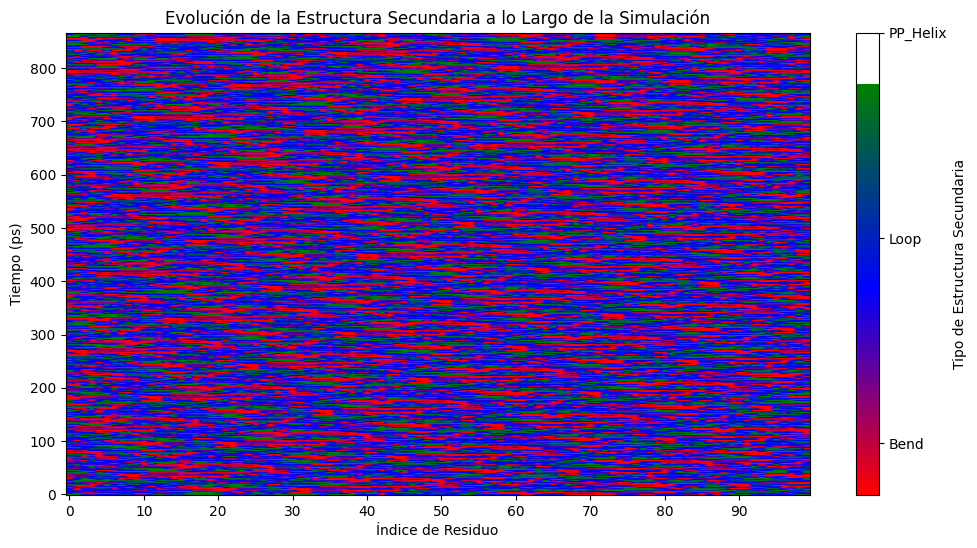

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.colors import LinearSegmentedColormap

# Cargar los datos del archivo de estructuras secundarias
file_path = 'sec_struct.dat'

try:
    with open(file_path, 'r') as file:
        data_str = file.read().replace('\n', '')  # Leer todo el archivo en una sola cadena
except FileNotFoundError:
    raise FileNotFoundError(f'El archivo en {file_path} no se encontró.')

# Crear un diccionario de mapeo de caracteres a números
# Definimos los colores para cada tipo de estructura secundaria
mapping = {
    'S': 0,  # Bend
    'P': 1,  # Loop
    '~': 2   # PP_Helix
}

# Convertir los caracteres en números usando el diccionario de mapeo
data_numeric = [mapping.get(char, -1) for char in data_str]  # Usa -1 para caracteres desconocidos

# Determinar la longitud total de caracteres
total_chars = len(data_numeric)
print(f'Número total de residuos: {total_chars}')

# Configuración de la gráfica
residuos_por_pantalla = 100
tiempos_totales = 1000  # Tiempo total en ps para mostrar
intervalo_tiempo = 100  # Intervalo de tiempo en ps entre etiquetas del eje Y

# Determinar el número de filas en la matriz de datos
n_filas = total_chars // residuos_por_pantalla
n_columnas = residuos_por_pantalla

# Dividir los datos en una matriz 2D
data_array = np.array(data_numeric[:n_filas * n_columnas])
data_matrix = data_array.reshape(n_filas, n_columnas)

print(f'Matriz generada con dimensiones: {data_matrix.shape[0]} filas x {data_matrix.shape[1]} columnas')
print(data_matrix)

# Crear una lista de colores para cada tipo de estructura secundaria
# Usamos una paleta de colores personalizada para cada tipo de estructura secundaria
colors = ['red', 'blue', 'green']  # Rojo para Bend, Azul para Loop, Verde para PP_Helix

# Crear el mapa de colores usando `LinearSegmentedColormap`
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

# Crear un array de tiempo para el eje Y (debe ajustarse a los tiempos reales de tu simulación)
# Aquí asumimos que el tiempo es uniforme y aumenta de 0 en adelante
# Cambia esta línea si tienes un archivo de tiempo real o datos de tiempo específicos
file_path_tiempo = 'tiempo.txt'  # Cambia este nombre si tu archivo de tiempos tiene otro nombre

try:
    with open(file_path_tiempo, 'r') as file:
        tiempos = np.array([float(line.strip()) for line in file])
except FileNotFoundError:
    print(f'El archivo en {file_path_tiempo} no se encontró. Se usará un tiempo total estimado.')
    tiempos = np.linspace(0, tiempos_totales, n_filas)

# Asegúrate de que `tiempos` tiene la misma longitud que `n_filas`
if len(tiempos) != n_filas:
    raise ValueError(f'El número de tiempos en {file_path_tiempo} no coincide con el número de filas en la matriz de datos.')

# Graficar los datos
plt.figure(figsize=(12, 6))
plt.imshow(data_matrix, cmap=cmap, origin='lower', aspect='auto')

# Añadir una barra de color para la leyenda
cbar = plt.colorbar(ticks=[0, 1, 2])
cbar.set_label('Tipo de Estructura Secundaria')
cbar.set_ticks([0.25, 1.25, 2.25])
cbar.set_ticklabels(['Bend', 'Loop', 'PP_Helix'])

plt.title('Evolución de la Estructura Secundaria a lo Largo de la Simulación')
plt.xlabel('Índice de Residuo')
plt.ylabel('Tiempo (ps)')  # Etiqueta del eje Y

# Ajustar el eje X para que muestre el índice de residuo real
# Mostrar etiquetas cada 100 residuos
plt.xticks(ticks=np.arange(0, residuos_por_pantalla, 10),
           labels=np.arange(0, residuos_por_pantalla * 10, 10))

# Ajustar el eje Y para que muestre el tiempo en lugar del número de frame
# Mostrar etiquetas cada 100 ps
ticks_tiempo = np.arange(0, tiempos_totales + intervalo_tiempo, intervalo_tiempo)
ticks_filas = np.linspace(0, n_filas - 1, len(ticks_tiempo), dtype=int)
plt.yticks(ticks=ticks_filas, labels=ticks_tiempo)

# Ajustar los bordes de la gráfica
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)

# Mostrar la gráfica
plt.show()


Número total de residuos: 86759
Matriz generada con dimensiones: 867 filas x 100 columnas
[[2 2 2 ... 0 2 2]
 [2 2 0 ... 2 2 2]
 [2 2 2 ... 2 0 0]
 ...
 [0 0 0 ... 2 1 1]
 [1 2 0 ... 2 2 2]
 [2 2 2 ... 0 0 2]]
El archivo en tiempo.txt no se encontró. Se usará un tiempo total estimado.


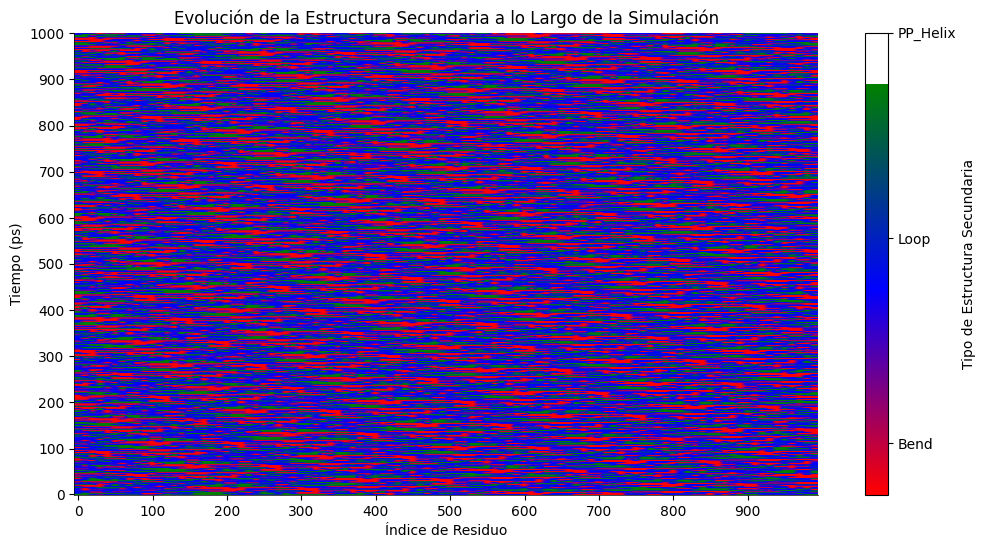

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.colors import LinearSegmentedColormap

# Cargar los datos del archivo de estructuras secundarias
file_path = 'sec_struct.dat'

try:
    with open(file_path, 'r') as file:
        data_str = file.read().replace('\n', '')  # Leer todo el archivo en una sola cadena
except FileNotFoundError:
    raise FileNotFoundError(f'El archivo en {file_path} no se encontró.')

# Crear un diccionario de mapeo de caracteres a números
# Definimos los colores para cada tipo de estructura secundaria
mapping = {
    'S': 0,  # Bend
    'P': 1,  # Loop
    '~': 2   # PP_Helix
}

# Convertir los caracteres en números usando el diccionario de mapeo
data_numeric = [mapping.get(char, -1) for char in data_str]  # Usa -1 para caracteres desconocidos

# Determinar la longitud total de caracteres
total_chars = len(data_numeric)
print(f'Número total de residuos: {total_chars}')

# Configuración de la gráfica
residuos_por_pantalla = 100
tiempos_totales = 1000  # Tiempo total en ps para mostrar
intervalo_tiempo = 100  # Intervalo de tiempo en ps entre etiquetas del eje Y

# Determinar el número de filas en la matriz de datos
n_filas = total_chars // residuos_por_pantalla
n_columnas = residuos_por_pantalla

# Dividir los datos en una matriz 2D
data_array = np.array(data_numeric[:n_filas * n_columnas])
data_matrix = data_array.reshape(n_filas, n_columnas)

print(f'Matriz generada con dimensiones: {data_matrix.shape[0]} filas x {data_matrix.shape[1]} columnas')
print(data_matrix)

# Crear una lista de colores para cada tipo de estructura secundaria
# Usamos una paleta de colores personalizada para cada tipo de estructura secundaria
colors = ['red', 'blue', 'green']  # Rojo para Bend, Azul para Loop, Verde para PP_Helix

# Crear el mapa de colores usando `LinearSegmentedColormap`
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

# Crear un array de tiempo para el eje Y (debe ajustarse a los tiempos reales de tu simulación)
# Aquí asumimos que el tiempo es uniforme y aumenta de 0 en adelante
# Cambia esta línea si tienes un archivo de tiempo real o datos de tiempo específicos
file_path_tiempo = 'tiempo.txt'  # Cambia este nombre si tu archivo de tiempos tiene otro nombre

try:
    with open(file_path_tiempo, 'r') as file:
        tiempos = np.array([float(line.strip()) for line in file])
except FileNotFoundError:
    print(f'El archivo en {file_path_tiempo} no se encontró. Se usará un tiempo total estimado.')
    tiempos = np.linspace(0, tiempos_totales, n_filas)

# Asegúrate de que `tiempos` tiene la misma longitud que `n_filas`
if len(tiempos) != n_filas:
    raise ValueError(f'El número de tiempos en {file_path_tiempo} no coincide con el número de filas en la matriz de datos.')

# Graficar los datos
plt.figure(figsize=(12, 6))
plt.imshow(data_matrix, cmap=cmap, origin='lower', aspect='auto')

# Añadir una barra de color para la leyenda
cbar = plt.colorbar(ticks=[0, 1, 2])
cbar.set_label('Tipo de Estructura Secundaria')
cbar.set_ticks([0.25, 1.25, 2.25])
cbar.set_ticklabels(['Bend', 'Loop', 'PP_Helix'])

plt.title('Evolución de la Estructura Secundaria a lo Largo de la Simulación')
plt.xlabel('Índice de Residuo')
plt.ylabel('Tiempo (ps)')  # Etiqueta del eje Y

# Ajustar el eje X para que muestre el índice de residuo real
# Mostrar etiquetas cada 100 residuos
plt.xticks(ticks=np.arange(0, residuos_por_pantalla, 10),
           labels=np.arange(0, residuos_por_pantalla * 10, 100))

# Ajustar el eje Y para que muestre el tiempo en lugar del número de frame
# Mostrar etiquetas cada 100 ps
ticks_tiempo = np.arange(0, tiempos_totales + intervalo_tiempo, intervalo_tiempo)
ticks_filas = np.linspace(0, n_filas - 1, len(ticks_tiempo), dtype=int)
plt.yticks(ticks=ticks_filas, labels=ticks_tiempo)

# Ajustar los bordes de la gráfica
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)

# Mostrar la gráfica
plt.show()


Número total de residuos: 86759
Matriz generada con dimensiones: 289 filas x 300 columnas
[[2 2 2 ... 2 0 0]
 [0 2 2 ... 2 2 1]
 [1 1 0 ... 2 2 2]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 0 0 0]
 [0 0 0 ... 0 0 2]]
El archivo en tiempo.txt no se encontró. Se usará un tiempo total estimado.


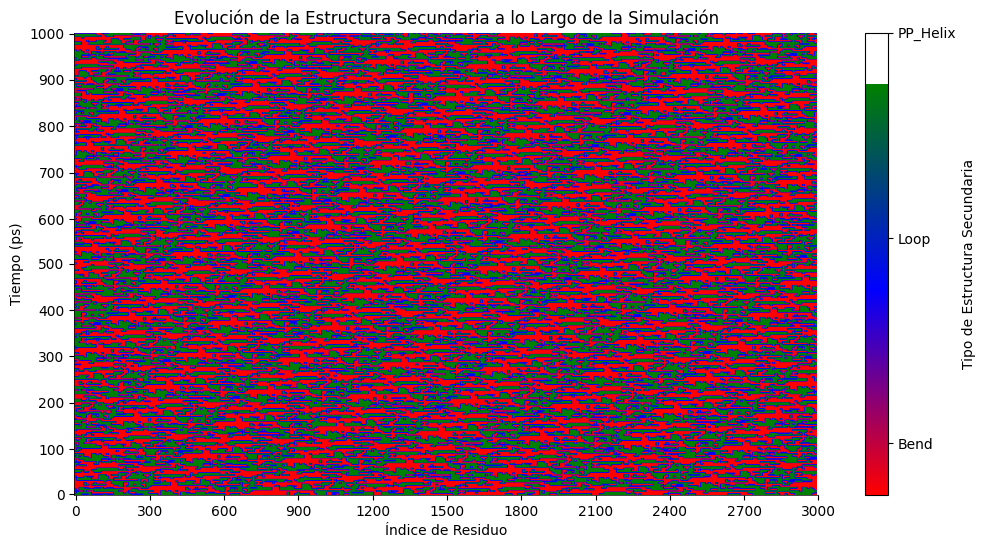

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.colors import LinearSegmentedColormap

# Cargar los datos del archivo de estructuras secundarias
file_path = 'sec_struct.dat'

try:
    with open(file_path, 'r') as file:
        data_str = file.read().replace('\n', '')  # Leer todo el archivo en una sola cadena
except FileNotFoundError:
    raise FileNotFoundError(f'El archivo en {file_path} no se encontró.')

# Crear un diccionario de mapeo de caracteres a números
# Definimos los colores para cada tipo de estructura secundaria
mapping = {
    'S': 0,  # Bend
    'P': 1,  # Loop
    '~': 2   # PP_Helix
}

# Convertir los caracteres en números usando el diccionario de mapeo
data_numeric = [mapping.get(char, -1) for char in data_str]  # Usa -1 para caracteres desconocidos

# Determinar la longitud total de caracteres
total_chars = len(data_numeric)
print(f'Número total de residuos: {total_chars}')

# Configuración de la gráfica
residuos_por_pantalla = 300  # Cambiar a 300 residuos por intervalo en el eje X
tiempos_totales = 1000  # Tiempo total en ps para mostrar
intervalo_tiempo = 100  # Intervalo de tiempo en ps entre etiquetas del eje Y

# Determinar el número de filas en la matriz de datos
n_filas = total_chars // residuos_por_pantalla
n_columnas = residuos_por_pantalla

# Dividir los datos en una matriz 2D
data_array = np.array(data_numeric[:n_filas * n_columnas])
data_matrix = data_array.reshape(n_filas, n_columnas)

print(f'Matriz generada con dimensiones: {data_matrix.shape[0]} filas x {data_matrix.shape[1]} columnas')
print(data_matrix)

# Crear una lista de colores para cada tipo de estructura secundaria
# Usamos una paleta de colores personalizada para cada tipo de estructura secundaria
colors = ['red', 'blue', 'green']  # Rojo para Bend, Azul para Loop, Verde para PP_Helix

# Crear el mapa de colores usando `LinearSegmentedColormap`
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

# Crear un array de tiempo para el eje Y (debe ajustarse a los tiempos reales de tu simulación)
# Aquí asumimos que el tiempo es uniforme y aumenta de 0 en adelante
# Cambia esta línea si tienes un archivo de tiempo real o datos de tiempo específicos
file_path_tiempo = 'tiempo.txt'  # Cambia este nombre si tu archivo de tiempos tiene otro nombre

try:
    with open(file_path_tiempo, 'r') as file:
        tiempos = np.array([float(line.strip()) for line in file])
except FileNotFoundError:
    print(f'El archivo en {file_path_tiempo} no se encontró. Se usará un tiempo total estimado.')
    tiempos = np.linspace(0, tiempos_totales, n_filas)

# Asegúrate de que `tiempos` tiene la misma longitud que `n_filas`
if len(tiempos) != n_filas:
    raise ValueError(f'El número de tiempos en {file_path_tiempo} no coincide con el número de filas en la matriz de datos.')

# Graficar los datos
plt.figure(figsize=(12, 6))
plt.imshow(data_matrix, cmap=cmap, origin='lower', aspect='auto')

# Añadir una barra de color para la leyenda
cbar = plt.colorbar(ticks=[0, 1, 2])
cbar.set_label('Tipo de Estructura Secundaria')
cbar.set_ticks([0.25, 1.25, 2.25])
cbar.set_ticklabels(['Bend', 'Loop', 'PP_Helix'])

plt.title('Evolución de la Estructura Secundaria a lo Largo de la Simulación')
plt.xlabel('Índice de Residuo')
plt.ylabel('Tiempo (ps)')  # Etiqueta del eje Y

# Ajustar el eje X para que muestre el índice de residuo real
# Mostrar etiquetas cada 300 residuos
plt.xticks(ticks=np.arange(0, residuos_por_pantalla + 1, 30),
           labels=np.arange(0, residuos_por_pantalla * 10 + 1, 300))

# Ajustar el eje Y para que muestre el tiempo en lugar del número de frame
# Mostrar etiquetas cada 100 ps
ticks_tiempo = np.arange(0, tiempos_totales + intervalo_tiempo, intervalo_tiempo)
ticks_filas = np.linspace(0, n_filas - 1, len(ticks_tiempo), dtype=int)
plt.yticks(ticks=ticks_filas, labels=ticks_tiempo)

# Ajustar los bordes de la gráfica
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)

# Mostrar la gráfica
plt.show()
